In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv("loan.csv")

C:\Users\ankit\AppData\Local\Temp\ipykernel_3460\2042666052.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("loan.csv")


In [3]:
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [5]:
df.size

4408587

In [6]:
df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [10]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

# Data Cleaning

In [11]:
for column in df.columns:
    if df[column].isnull().sum() != 0:
        print(column, " - ", df[column].isnull().sum(), " - ", df[column].dtypes)

emp_title  -  2459  -  object
emp_length  -  1075  -  object
desc  -  12942  -  object
title  -  11  -  object
mths_since_last_delinq  -  25682  -  float64
mths_since_last_record  -  36931  -  float64
revol_util  -  50  -  object
last_pymnt_d  -  71  -  object
next_pymnt_d  -  38577  -  object
last_credit_pull_d  -  2  -  object
collections_12_mths_ex_med  -  56  -  float64
mths_since_last_major_derog  -  39717  -  float64
annual_inc_joint  -  39717  -  float64
dti_joint  -  39717  -  float64
verification_status_joint  -  39717  -  float64
tot_coll_amt  -  39717  -  float64
tot_cur_bal  -  39717  -  float64
open_acc_6m  -  39717  -  float64
open_il_6m  -  39717  -  float64
open_il_12m  -  39717  -  float64
open_il_24m  -  39717  -  float64
mths_since_rcnt_il  -  39717  -  float64
total_bal_il  -  39717  -  float64
il_util  -  39717  -  float64
open_rv_12m  -  39717  -  float64
open_rv_24m  -  39717  -  float64
max_bal_bc  -  39717  -  float64
all_util  -  39717  -  float64
total_rev_hi

In [15]:
categorical_columns = ["emp_title", "emp_length", "desc", "title", "revol_util", "last_pymnt_d", "next_pymnt_d", "last_credit_pull_d"]

In [16]:
for category in categorical_columns:
    print(category, " - ", df[category].unique().size, "\n")

emp_title  -  28821 

emp_length  -  12 

desc  -  26527 

title  -  19616 

revol_util  -  1090 

last_pymnt_d  -  102 

next_pymnt_d  -  3 

last_credit_pull_d  -  107 



#### From above analysis on categorical columns, to replace null values or delete its row we can achieve it as below

- emp_title has 28821 unique values so replacing it with mode value will not be beneficial, its better to drop these rows since as a banker I am not assured if this person will repay or not. But before deleting lets cross check the loan status for the same
- For emp_length since unique values are only 12, we will replace null values with the mode.
- For null desc we will leave it as is, since this is more like extra column and not a category column
- For title as well we will leave the column as is, since this is more like extra column and not a category column
- revol_util can be modified as numerical column, and null values of it can be replaced by median
- last_pymnt_d, next_pymnt_d, last_credit_pull_d are date columns

In [20]:
df[df.emp_title.isnull()]["loan_status"].value_counts()

loan_status
Fully Paid     1902
Charged Off     484
Current          73
Name: count, dtype: int64

> So since we have valid loan status for all emp_title that corresponds to null title, lets introduce a new category as Unknown

In [21]:
df["emp_title"].fillna("Unknown", inplace=True)

In [22]:
emp_lenth_mode = df["emp_length"].mode()[0]
df["emp_length"].fillna(emp_lenth_mode, inplace=True)

In [23]:
df['emp_length'] = pd.Categorical(df['emp_length'], categories=df["emp_length"].unique(), ordered=True)

In [24]:
df["revol_util"] = df["revol_util"].apply(lambda x: float(x[:-1]) if pd.notnull(x) else np.nan)

In [25]:
revol_util_median = df["revol_util"].median()
df["revol_util"].fillna(revol_util_median, inplace=True)

In [27]:
df["last_pymnt_date"] = pd.to_datetime(df["last_pymnt_d"], format="%b-%y", errors="coerce")
df["next_pymnt_date"] = pd.to_datetime(df["next_pymnt_d"], format="%b-%y", errors="coerce")
df["last_credit_pull_date"] = pd.to_datetime(df["last_credit_pull_d"], format="%b-%y", errors="coerce")
df["issue_date"] = pd.to_datetime(df["issue_d"], format="%b-%y", errors="coerce")

In [28]:
df.dtypes

id                                     int64
member_id                              int64
loan_amnt                              int64
funded_amnt                            int64
funded_amnt_inv                      float64
                                   ...      
total_il_high_credit_limit           float64
last_pymnt_date               datetime64[ns]
next_pymnt_date               datetime64[ns]
last_credit_pull_date         datetime64[ns]
issue_date                    datetime64[ns]
Length: 115, dtype: object

#### Resolving null for Numerical Columns

In [29]:
numerical_columns = ["mths_since_last_delinq", "mths_since_last_record", "collections_12_mths_ex_med", "mths_since_last_major_derog", "annual_inc_joint", "dti_joint", "verification_status_joint", "tot_coll_amt", "tot_cur_bal", "open_acc_6m", "open_il_6m", "open_il_12m", "open_il_24m", "mths_since_rcnt_il", "total_bal_il", "il_util", "open_rv_12m", "open_rv_24m", "max_bal_bc", "all_util", "total_rev_hi_lim", "inq_fi", "total_cu_tl", "inq_last_12m", "acc_open_past_24mths", "avg_cur_bal", "bc_open_to_buy", "bc_util", "chargeoff_within_12_mths", "mo_sin_old_il_acct", "mo_sin_old_rev_tl_op", "mo_sin_rcnt_rev_tl_op", "mo_sin_rcnt_tl", "mort_acc", "mths_since_recent_bc", "mths_since_recent_bc_dlq", "mths_since_recent_inq", "mths_since_recent_revol_delinq", "num_accts_ever_120_pd", "num_actv_bc_tl", "num_actv_rev_tl", "num_bc_sats", "num_bc_tl", "num_il_tl", "num_op_rev_tl", "num_rev_accts", "num_rev_tl_bal_gt_0", "num_sats", 
"num_tl_120dpd_2m", "num_tl_30dpd", "num_tl_90g_dpd_24m", "num_tl_op_past_12m", "pct_tl_nvr_dlq", "percent_bc_gt_75", "pub_rec_bankruptcies", "tax_liens", "tot_hi_cred_lim", "total_bal_ex_mort", "total_bc_limit", "total_il_high_credit_limit"]

##### Updating null values to median

In [30]:
for numerical in numerical_columns:
    if numerical in df.columns:
        print(f"Processing column: {numerical}")
        numerical_median = df[numerical].median()
        print(f"Median of {numerical}: {numerical_median}")

        # If the median is NaN, print a warning
        if pd.isna(numerical_median):
            print(f"Warning: Median of {numerical} is NaN. Skipping this column.")
        else:
            df[numerical].fillna(numerical_median, inplace=True)
        
        # Verify if the null values were filled
        print(f"Remaining NaNs in {numerical} after filling: {df[numerical].isnull().sum()}")
    else:
        print(f"Column {numerical} does not exist in the DataFrame.")

Processing column: mths_since_last_delinq
Median of mths_since_last_delinq: 34.0
Remaining NaNs in mths_since_last_delinq after filling: 0
Processing column: mths_since_last_record
Median of mths_since_last_record: 90.0
Remaining NaNs in mths_since_last_record after filling: 0
Processing column: collections_12_mths_ex_med
Median of collections_12_mths_ex_med: 0.0
Remaining NaNs in collections_12_mths_ex_med after filling: 0
Processing column: mths_since_last_major_derog
Median of mths_since_last_major_derog: nan
Remaining NaNs in mths_since_last_major_derog after filling: 39717
Processing column: annual_inc_joint
Median of annual_inc_joint: nan
Remaining NaNs in annual_inc_joint after filling: 39717
Processing column: dti_joint
Median of dti_joint: nan
Remaining NaNs in dti_joint after filling: 39717
Processing column: verification_status_joint
Median of verification_status_joint: nan
Remaining NaNs in verification_status_joint after filling: 39717
Processing column: tot_coll_amt
Media

##### Ignoring columns which has more than 80% data missing

In [31]:
for column in df.columns:
    nan_cotribution = (df[column].isnull().sum() / df.size) * 100
    if nan_cotribution < 0.8 :
        print(column, " - ", df[column].isnull().sum(), " - ", df[column].dtypes, " - ", (df[column].isnull().sum() / df.size) * 100)

id  -  0  -  int64  -  0.0
member_id  -  0  -  int64  -  0.0
loan_amnt  -  0  -  int64  -  0.0
funded_amnt  -  0  -  int64  -  0.0
funded_amnt_inv  -  0  -  float64  -  0.0
term  -  0  -  object  -  0.0
int_rate  -  0  -  object  -  0.0
installment  -  0  -  float64  -  0.0
grade  -  0  -  object  -  0.0
sub_grade  -  0  -  object  -  0.0
emp_title  -  0  -  object  -  0.0
emp_length  -  0  -  category  -  0.0
home_ownership  -  0  -  object  -  0.0
annual_inc  -  0  -  float64  -  0.0
verification_status  -  0  -  object  -  0.0
issue_d  -  0  -  object  -  0.0
loan_status  -  0  -  object  -  0.0
pymnt_plan  -  0  -  object  -  0.0
url  -  0  -  object  -  0.0
desc  -  12942  -  object  -  0.2833525453452743
purpose  -  0  -  object  -  0.0
title  -  11  -  object  -  0.00024083433772199178
zip_code  -  0  -  object  -  0.0
addr_state  -  0  -  object  -  0.0
dti  -  0  -  float64  -  0.0
delinq_2yrs  -  0  -  int64  -  0.0
earliest_cr_line  -  0  -  object  -  0.0
inq_last_6mths  - 

In [32]:
df.int_rate = df.int_rate.apply(lambda x: float(x[:-1]))

## Usable Column after Data Cleaning

- id           -  A unique LC assigned ID for the loan listing.
- member_id    -  A unique LC assigned Id for the borrower member.
- loan_amnt    -  The listed amount of the loan applied for by the borrower. If at some point in time, the credit department 
                reduces the loan amount, then it will be reflected in this value.
- funded_amnt  - The total amount committed to that loan at that point in time.
- funded_amnt_inv  - The total amount committed by investors for that loan at that point in time.
- term         - The number of payments on the loan. Values are in months and can be either 36 or 60.  
- int_rate  - Interest Rate on the loan
- installment  - The monthly payment owed by the borrower if the loan originates.
- grade  -  LC assigned loan grade
- sub_grade  -  LC assigned loan subgrade
- emp_title  -  The job title supplied by the Borrower when applying for the loan.*
- emp_length  -  Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
- home_ownership  - The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.  
- annual_inc  -  The self-reported annual income provided by the borrower during registration.
- verification_status  -  Indicates if income was verified by LC, not verified, or if the income source was verified
- issue_d  -  The month which the loan was funded (Create a date column for this)
- loan_status  -  Current status of the loan
- pymnt_plan  -  Indicates if a payment plan has been put in place for the loan
- url  -  URL for the LC page with listing data.
- desc  -  Loan description provided by the borrower
- purpose  -  A category provided by the borrower for the loan request. 
- title  -  The loan title provided by the borrower
- zip_code  -  The first 3 numbers of the zip code provided by the borrower in the loan application.
- addr_state  -  The state provided by the borrower in the loan application
- dti  -  A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
- delinq_2yrs  -  The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
- earliest_cr_line  -  The month the borrower's earliest reported credit line was opened
- inq_last_6mths  -  The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
- mths_since_last_delinq  -  The number of months since the borrower's last delinquency.
- mths_since_last_record  -  The number of months since the last public record.
- open_acc  -  The number of open credit lines in the borrower's credit file.
- pub_rec  -  Number of derogatory public records
- revol_bal  -  Total credit revolving balance
- revol_util  -  Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
- total_acc  - The total number of credit lines currently in the borrower's credit file  
- initial_list_status  - The initial listing status of the loan. Possible values are – W, F 
- out_prncp  -  Remaining outstanding principal for total amount funded
- out_prncp_inv  -  Remaining outstanding principal for portion of total amount funded by investors
- total_pymnt  -  Payments received to date for total amount funded
- total_pymnt_inv  -  Payments received to date for portion of total amount funded by investors
- total_rec_prncp  -  Principal received to date
- total_rec_int  -  Interest received to date
- total_rec_late_fee  -  Late fees received to date
- recoveries  -  post charge off gross recovery
- collection_recovery_fee  -  post charge off collection fee
- last_pymnt_amnt  -  Last total payment amount received
- collections_12_mths_ex_med  -  Number of collections in 12 months excluding medical collections
- policy_code  -  publicly available policy_code=1 <br>
                  new products not publicly available policy_code=2
- application_type  -  Indicates whether the loan is an individual application or a joint application with two co-borrowers
- acc_now_delinq  -  The number of accounts on which the borrower is now delinquent.
- chargeoff_within_12_mths  -  Number of charge-offs within 12 months
- delinq_amnt  -  The past-due amount owed for the accounts on which the borrower is now delinquent.
- pub_rec_bankruptcies  -  Number of public record bankruptcies
- tax_liens  -  Number of tax liens
- last_pymnt_date  -  Last month payment was received
- last_credit_pull_date  -  The most recent month LC pulled credit for this loan

## Analyzing how different variables impact Loan Status

#### Segregating category, numerical and extra columns

In [33]:
categorical_columns = ["term", "grade", "sub_grade",  "emp_length", "home_ownership", "verification_status", "loan_status", "purpose", "addr_state"]
numerical_columns = ["loan_amnt", "funded_amnt", "funded_amnt_inv", "int_rate", "installment", "annual_inc", "dti", "delinq_2yrs", "inq_last_6mths", "mths_since_last_delinq", "mths_since_last_record", "open_acc", "pub_rec", "revol_bal", "revol_util", "total_acc", "out_prncp", "out_prncp_inv", "total_pymnt", "total_pymnt_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_amnt", "collections_12_mths_ex_med", "acc_now_delinq", "chargeoff_within_12_mths", "delinq_amnt", "pub_rec_bankruptcies", "tax_liens"]
extra_columns = ["id", "member_id", "issue_date", "url", "desc", "earliest_cr_line", "policy_code", "last_pymnt_date", "last_credit_pull_date", "emp_title", "pymnt_plan", "title", "zip_code", "initial_list_status", "application_type"]

##### Analyzing Different Categories over Loan Status

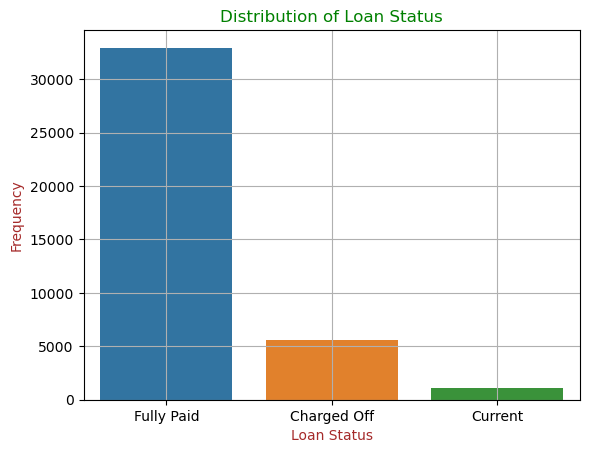

In [35]:
loan_status = df.loan_status.value_counts()
sns.barplot(x=loan_status.index, y=loan_status.values)

plt.title("Distribution of Loan Status", color="green")
plt.xlabel("Loan Status", color="brown")
plt.ylabel("Frequency", color="brown")

plt.grid(True)

plt.show()

- More than 30,000 individuals have paid there loans
- Slightly over 5,000 people have been charged off
- Less than 2,500 loans are active.

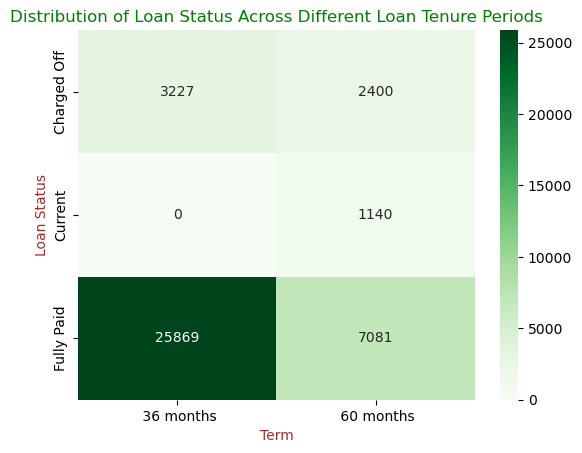

In [37]:
data = pd.crosstab(df["loan_status"], df["term"])

sns.heatmap(data, annot=True, fmt="d", cmap="Greens")

plt.title("Distribution of Loan Status Across Different Loan Tenure Periods", color="green")
plt.xlabel("Term", color="brown")
plt.ylabel("Loan Status", color="brown")

plt.show()

> Analysis shows that while shorter loan tenures have a higher rate of being fully paid off, they also have a higher charge-off rate. In contrast, longer loan tenures seem to offer borrowers more flexibility, resulting in fewer charge-offs, though they also have fewer fully paid loans, with many loans still ongoing

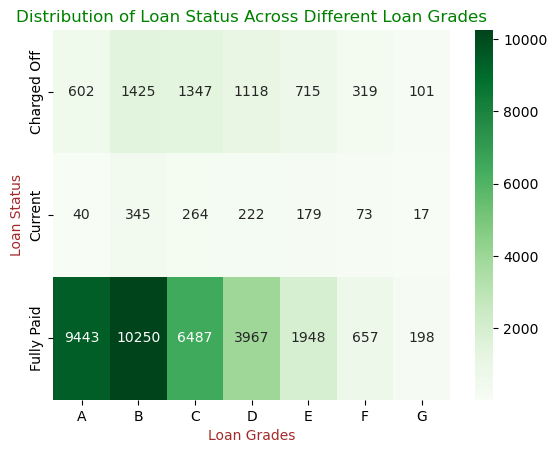

In [39]:
data = pd.crosstab(df["loan_status"], df["grade"])

sns.heatmap(data, annot=True, fmt="d", cmap="Greens")

plt.title("Distribution of Loan Status Across Different Loan Grades", color="green")
plt.xlabel("Loan Grades", color="brown")
plt.ylabel("Loan Status", color="brown")

plt.show()

> Loan grades A and B have the highest number of fully paid loans, indicating lower risk and higher repayment success. As the grades decline from A to G, the number of fully paid loans decreases, while charged-off loans increase, showing higher risk for lower-grade loans. Current loans are more common in higher grades, particularly A and B, suggesting they are in good standing and likely to be repaid. Overall, higher-grade loans are more reliable, while lower-grade loans carry more risk

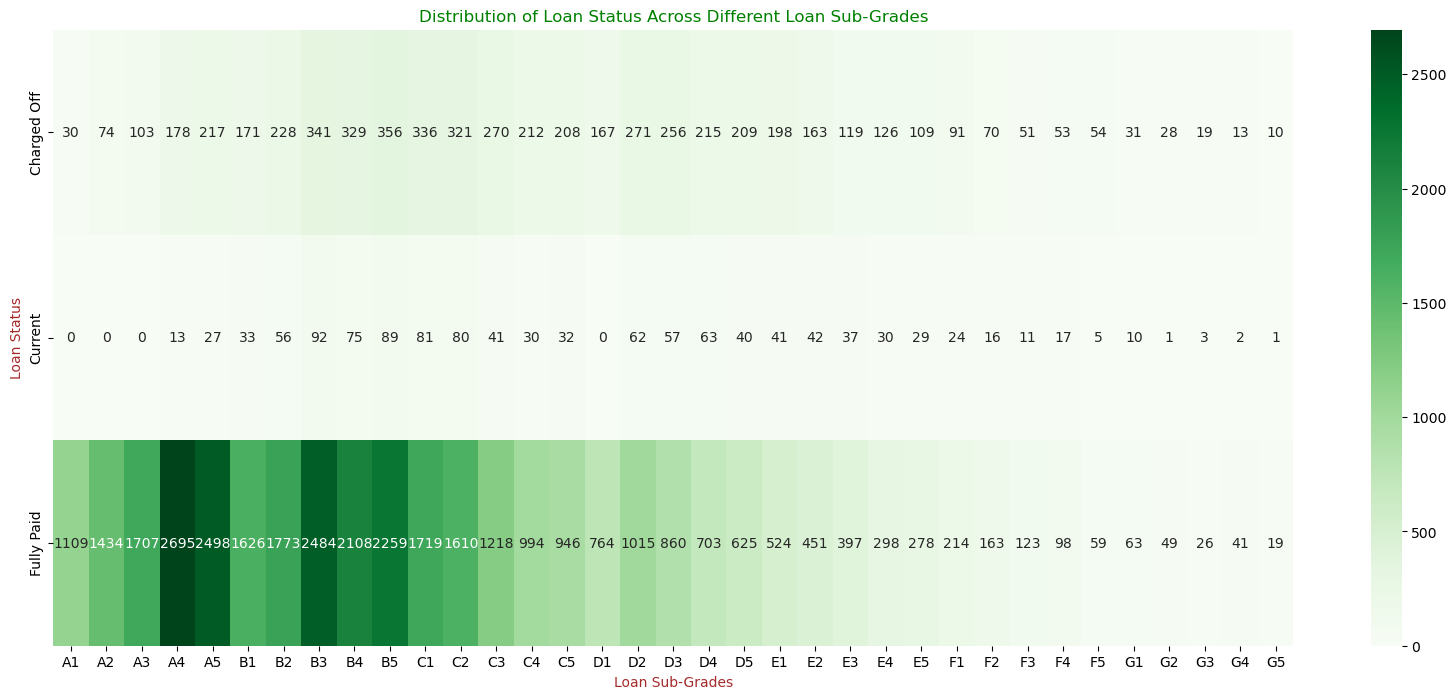

In [44]:
data = pd.crosstab(df["loan_status"], df["sub_grade"])

plt.figure(figsize=[20, 8])
sns.heatmap(data, annot=True, fmt="d", cmap="Greens")

plt.title("Distribution of Loan Status Across Different Loan Sub-Grades", color="green")
plt.xlabel("Loan Sub-Grades", color="brown")
plt.ylabel("Loan Status", color="brown")

plt.show()

> Higher sub-grades (A1 to B5) have more fully paid loans, while lower sub-grades (E1 to G5) show an increase in charged-off loans. The number of current loans is more prominent in the middle sub-grades (B2 to D3). This pattern indicates that loans with higher sub-grades are generally repaid more successfully, whereas lower sub-grades have a higher risk of default.

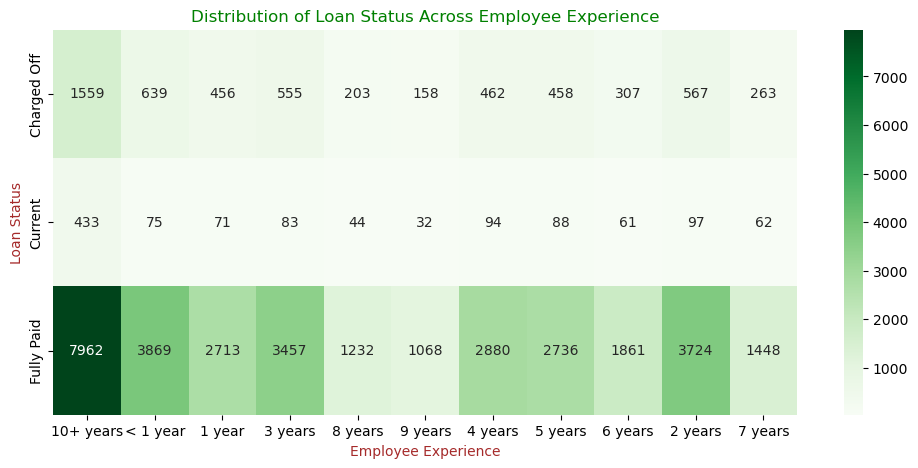

In [47]:
data = pd.crosstab(df["loan_status"], df["emp_length"])

plt.figure(figsize=[12, 5])
sns.heatmap(data, annot=True, fmt="d", cmap="Greens")

plt.title("Distribution of Loan Status Across Employee Experience", color="green")
plt.xlabel("Employee Experience", color="brown")
plt.ylabel("Loan Status", color="brown")

plt.show()

> Employees with 10+ years of experience have the highest number of both fully paid and charged-off loans. However, the proportion of charged-off loans is significantly lower for this group compared to employees with less experience. This indicates a strong positive correlation between employee tenure and loan repayment responsibility.

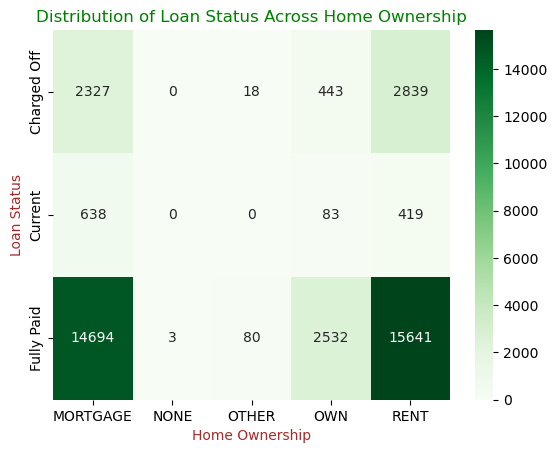

In [48]:
data = pd.crosstab(df["loan_status"], df["home_ownership"])

sns.heatmap(data, annot=True, fmt="d", cmap="Greens")

plt.title("Distribution of Loan Status Across Home Ownership", color="green")
plt.xlabel("Home Ownership", color="brown")
plt.ylabel("Loan Status", color="brown")

plt.show()

> Home ownership is strongly correlated with loan repayment. Renters have the highest number of charged-off loans as well as fully paid loans, while homeowners (mortgage and own) have significantly lower charge-off rates and higher fully paid loan counts. This indicates a substantial impact of home ownership on loan repayment behavior.

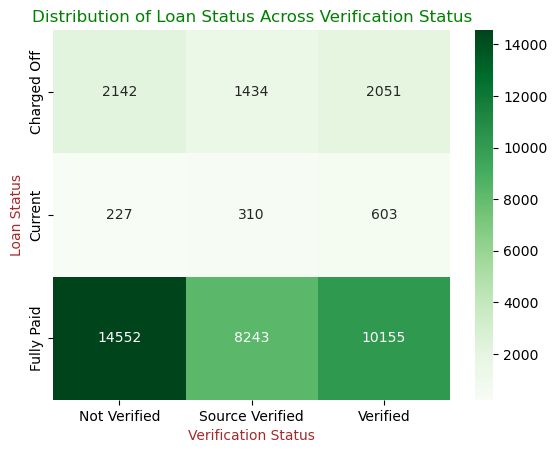

In [49]:
data = pd.crosstab(df["loan_status"], df["verification_status"])

sns.heatmap(data, annot=True, fmt="d", cmap="Greens")

plt.title("Distribution of Loan Status Across Verification Status", color="green")
plt.xlabel("Verification Status", color="brown")
plt.ylabel("Loan Status", color="brown")

plt.show()

> Verification status shows a strong correlation with loan repayment outcomes. Non-verified individuals exhibit the highest numbers of both fully paid and charged-off loans. In contrast, loans with verified sources have the lowest incidence of being charged off, indicating better credit performance. Additionally, loans for verified individuals have the highest proportion of current (ongoing) loans, suggesting that verification is linked to more active and reliable repayment behavior

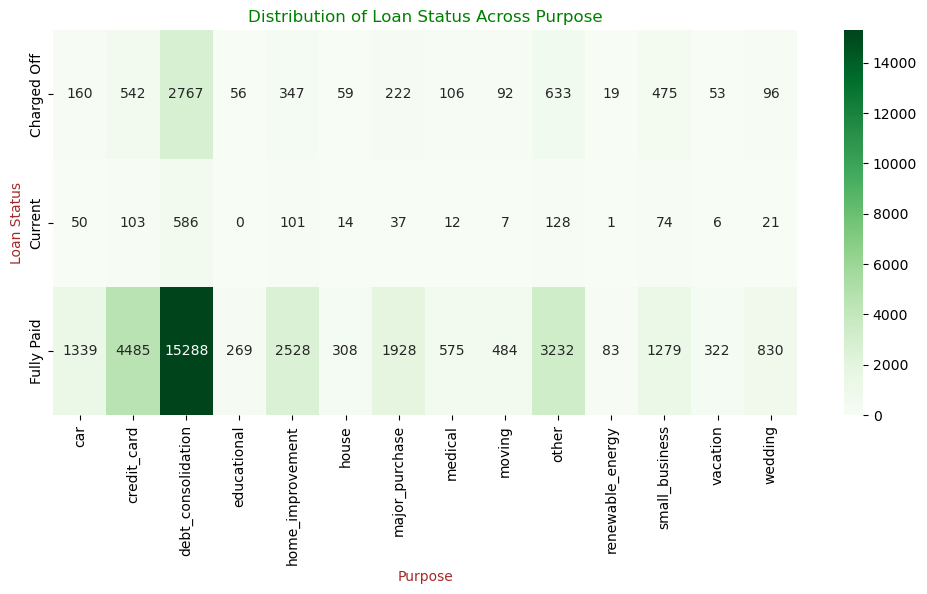

In [51]:
data = pd.crosstab(df["loan_status"], df["purpose"])

plt.figure(figsize=[12, 5])
sns.heatmap(data, annot=True, fmt="d", cmap="Greens")

plt.title("Distribution of Loan Status Across Purpose", color="green")
plt.xlabel("Purpose", color="brown")
plt.ylabel("Loan Status", color="brown")

plt.show()

> Debt consolidation loans have the highest fully paid rate (as well as highest charged-off), while vacation loans have the lowest. Additionally, credit card loans exhibit second higher number of charged-off accounts compared to other loan purposes. This suggests that loan purpose significantly influences repayment behavior.

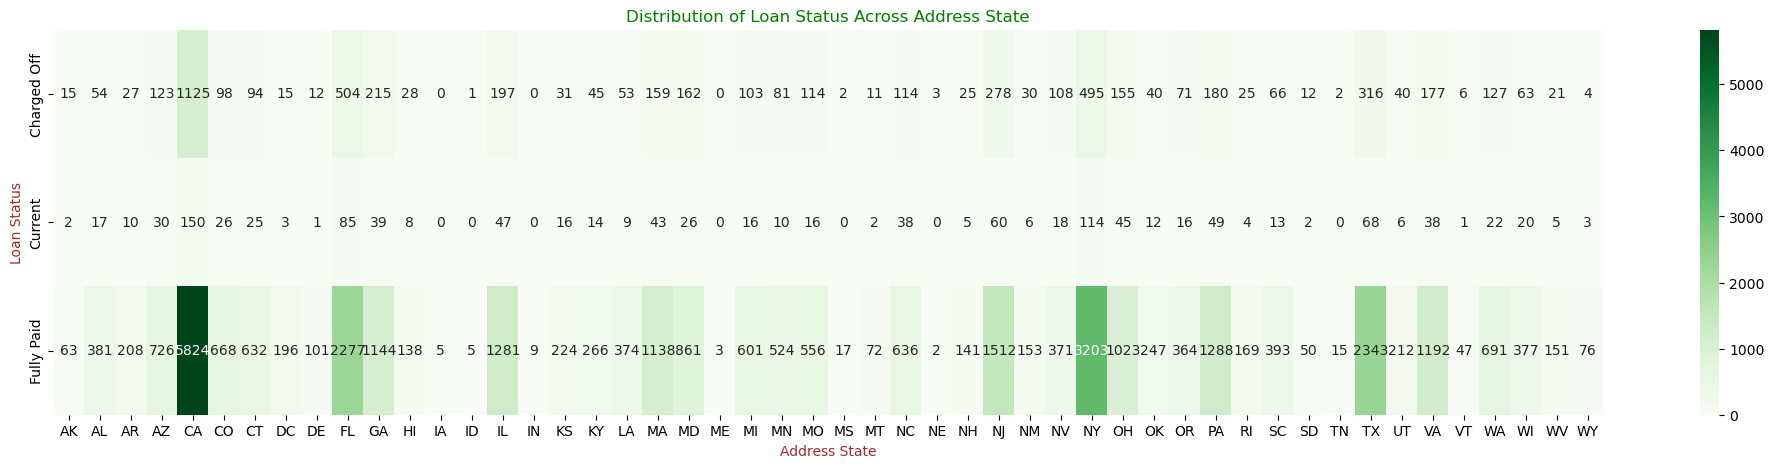

In [56]:
data = pd.crosstab(df["loan_status"], df["addr_state"])

plt.figure(figsize=[25, 5])
sns.heatmap(data, annot=True, fmt="d", cmap="Greens")

plt.title("Distribution of Loan Status Across Address State", color="green")
plt.xlabel("Address State", color="brown")
plt.ylabel("Loan Status", color="brown")

plt.show()

> State CA has the highest fully paid and charged off loans, while NE have the lowest paid loan and a greater charged off loan. This suggests address state has a influence on loan repayment status.

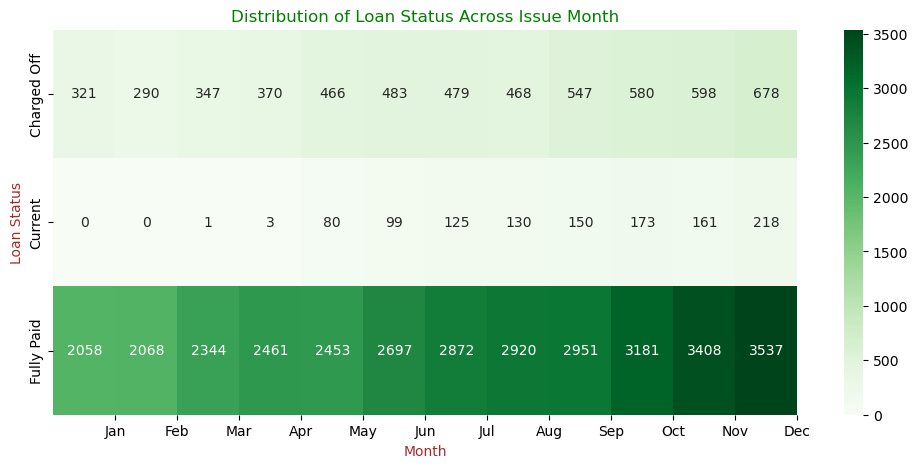

In [64]:
data = pd.crosstab(df["loan_status"], df["issue_date"].dt.month)

plt.figure(figsize=[12, 5])
sns.heatmap(data, annot=True, fmt="d", cmap="Greens")

plt.title("Distribution of Loan Status Across Issue Month", color="green")
plt.xlabel("Month", color="brown")
plt.ylabel("Loan Status", color="brown")

plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])

plt.show()

> Loan issuance across months significantly impacts repayment behavior. Months with higher loan issuance generally have more fully paid loans. Least charged-off occured on Month Feb. However, month-to-month variations exist, suggesting other factors influence repayment outcomes.

In [65]:
df.annual_inc.min()

4000.0

In [66]:
df.annual_inc.max()

6000000.0

In [67]:
bins = [4000, 10000, 50000, 100000, 500000, 1000000, 6000000]

# Define labels for the bins
labels = ["4k-10k", "10k-50k", "50k-100k", "100k-500k", "500k-1M", "1M-6M"]

# Create a new column 'annual_inc_category' with the annual income categories
df["annual_inc_category"] = pd.cut(df["annual_inc"], bins=bins, labels=labels, include_lowest=True)

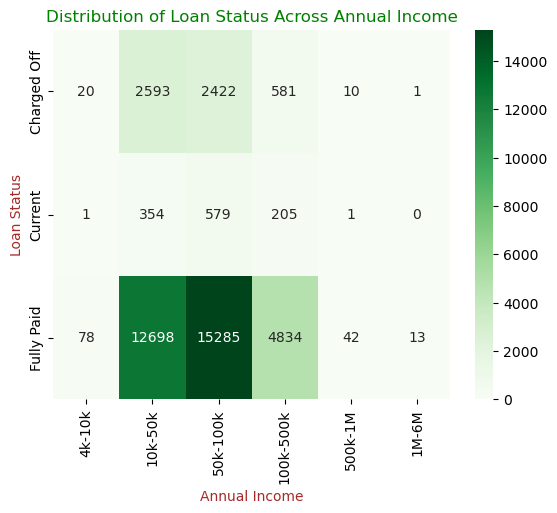

In [68]:
data = pd.crosstab(df["loan_status"], df["annual_inc_category"])

# plt.figure(figsize=[12, 5])
sns.heatmap(data, annot=True, fmt="d", cmap="Greens")

plt.title("Distribution of Loan Status Across Annual Income", color="green")
plt.xlabel("Annual Income", color="brown")
plt.ylabel("Loan Status", color="brown")

plt.show()

> Higher annual income is strongly correlated with better loan repayment. Borrowers with incomes between 50k-100k have significantly higher fully paid loan rates. Borrowers with income between 10k-50k have significantly higher charged-off loans. Income level is a key factor influencing loan repayment behavior.

#### Analyzing Different Numerical Columns over Loan Status

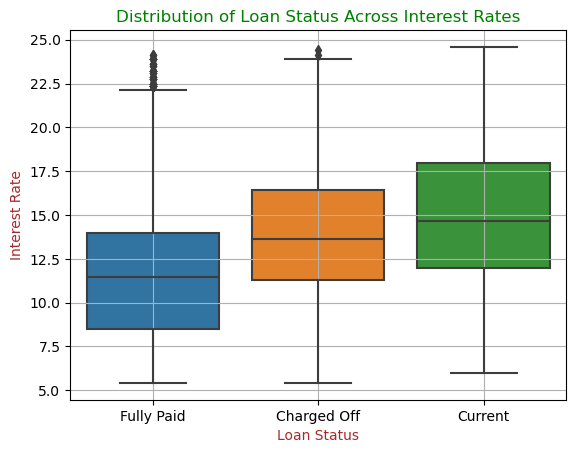

In [69]:
sns.boxplot(x="loan_status", y="int_rate", data=df)

plt.title("Distribution of Loan Status Across Interest Rates", color="green")
plt.xlabel("Loan Status", color="brown")
plt.ylabel("Interest Rate", color="brown")

plt.grid(True)

plt.show()

> Interest rate significantly impacts loan status. Higher interest rates are associated with a larger proportion of charged-off loans and a smaller proportion of fully paid loans. This suggests a strong correlation between interest rate and loan repayment risk

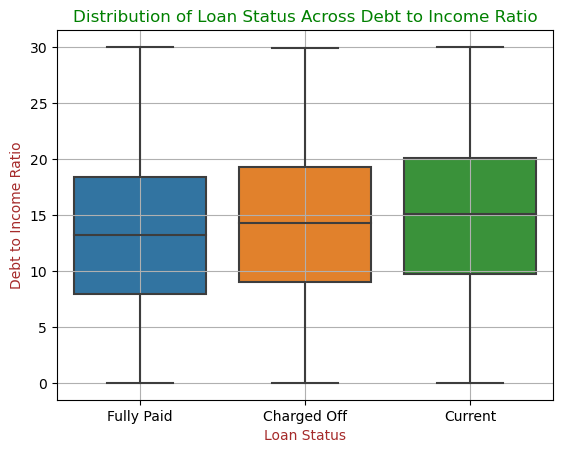

In [70]:
sns.boxplot(x="loan_status", y="dti", data=df)

plt.title("Distribution of Loan Status Across Debt to Income Ratio", color="green")
plt.xlabel("Loan Status", color="brown")
plt.ylabel("Debt to Income Ratio", color="brown")

plt.grid(True)

plt.show()

> Higher debt-to-income ratio is associated with a slightly greater likelihood of loan default. Borrowers with lower debt-to-income ratios have a higher proportion of fully paid loans and a lower proportion of charged-off loans. This suggests a slightly strong correlation between debt-to-income ratio and loan repayment risk.

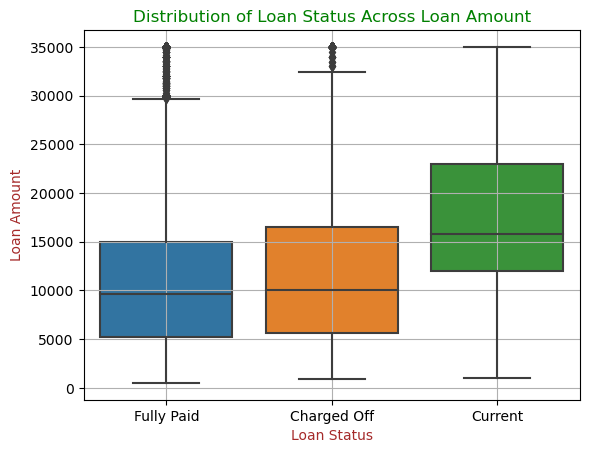

In [72]:
sns.boxplot(x="loan_status", y="loan_amnt", data=df)

plt.title("Distribution of Loan Status Across Loan Amount", color="green")
plt.xlabel("Loan Status", color="brown")
plt.ylabel("Loan Amount", color="brown")

plt.grid(True)

plt.show()

> Loan amount significantly impacts repayment behavior. Higher loan amounts are associated with a greater likelihood of loan default. Borrowers with lower loan amounts have a higher proportion of fully paid loans and a lower proportion of charged-off loans. This suggests a strong correlation between loan amount and loan repayment risk.

##### Analysis of Loan Status over multi categories

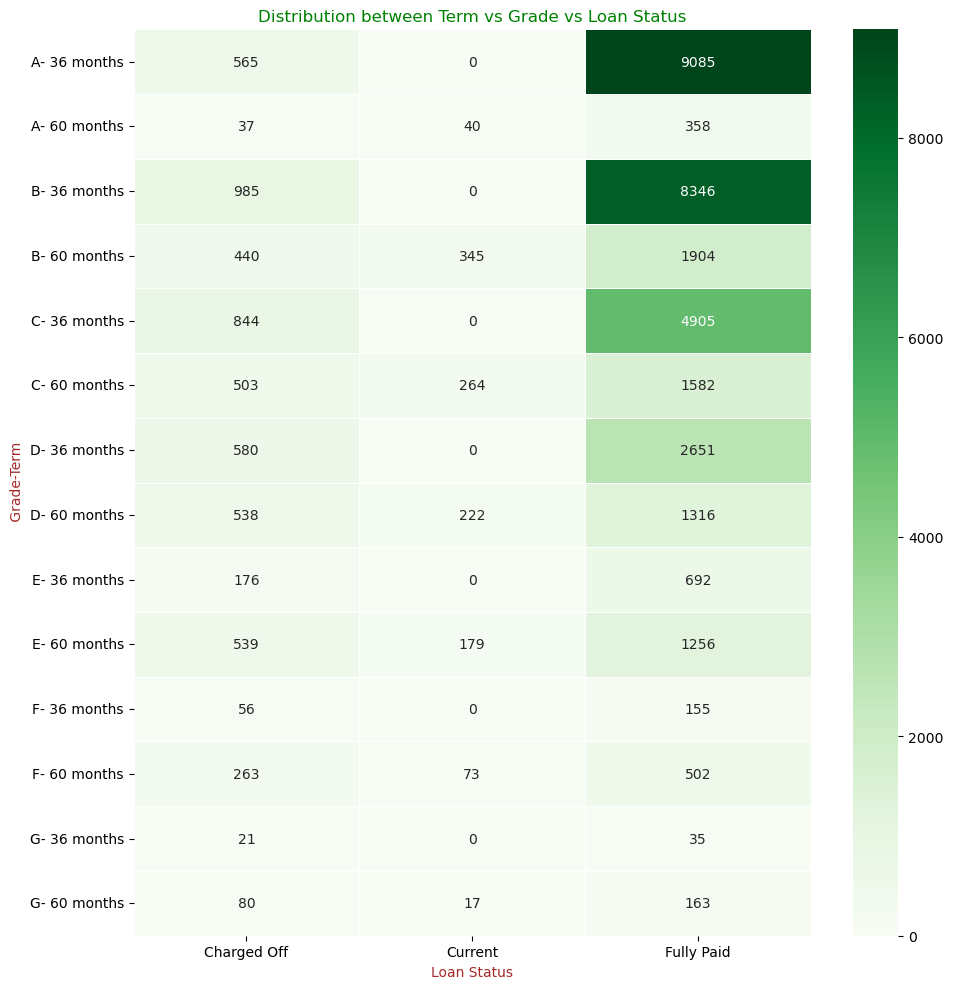

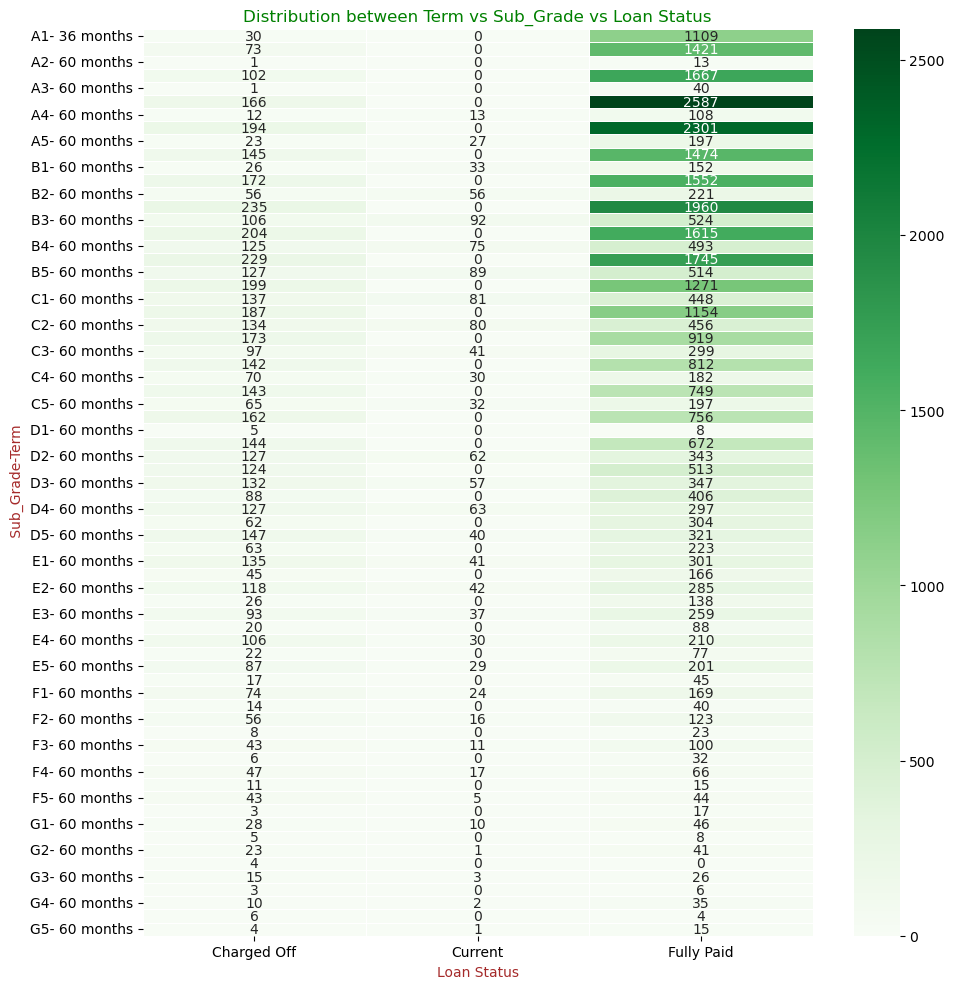

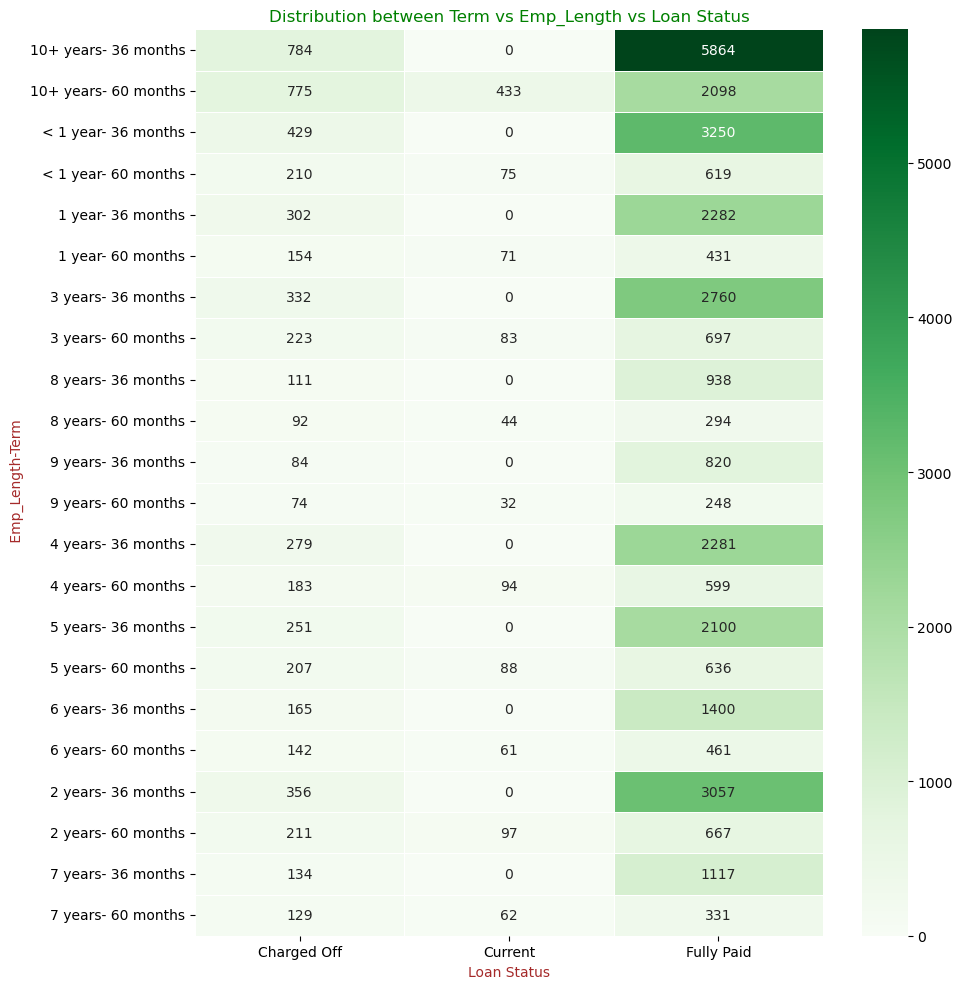

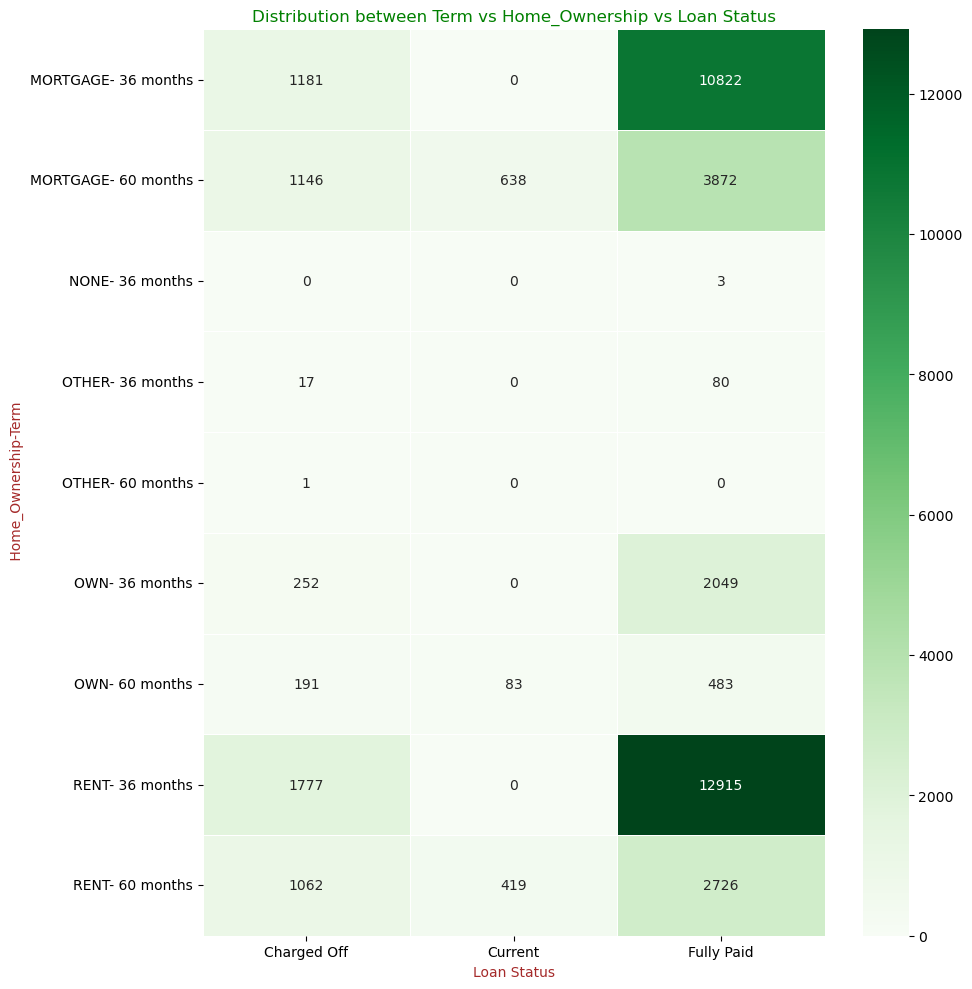

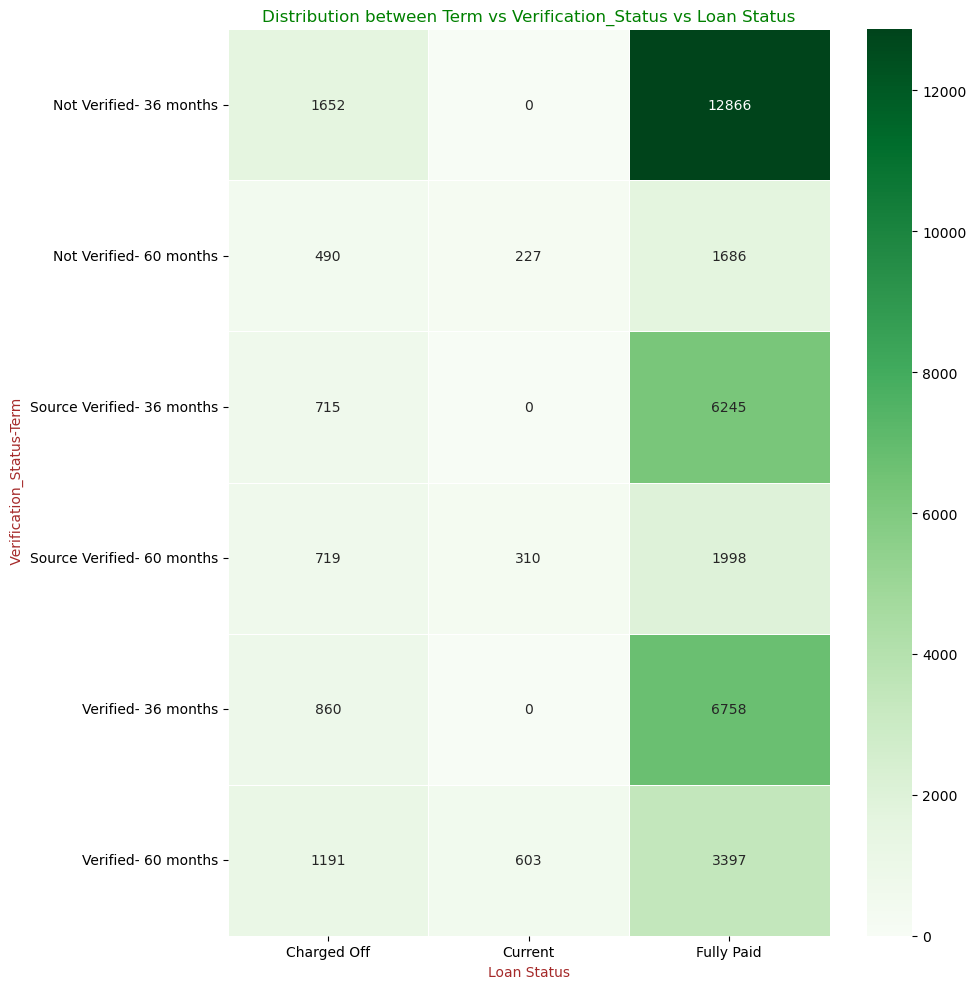

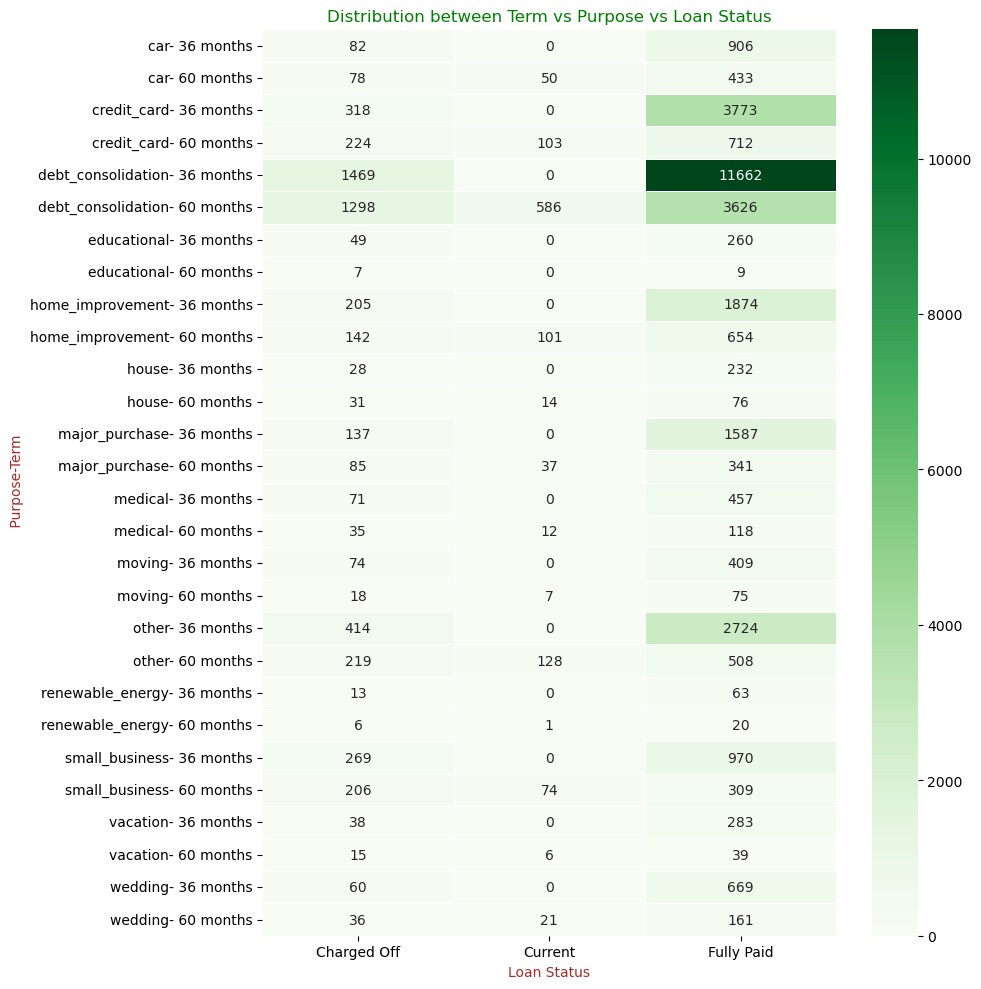

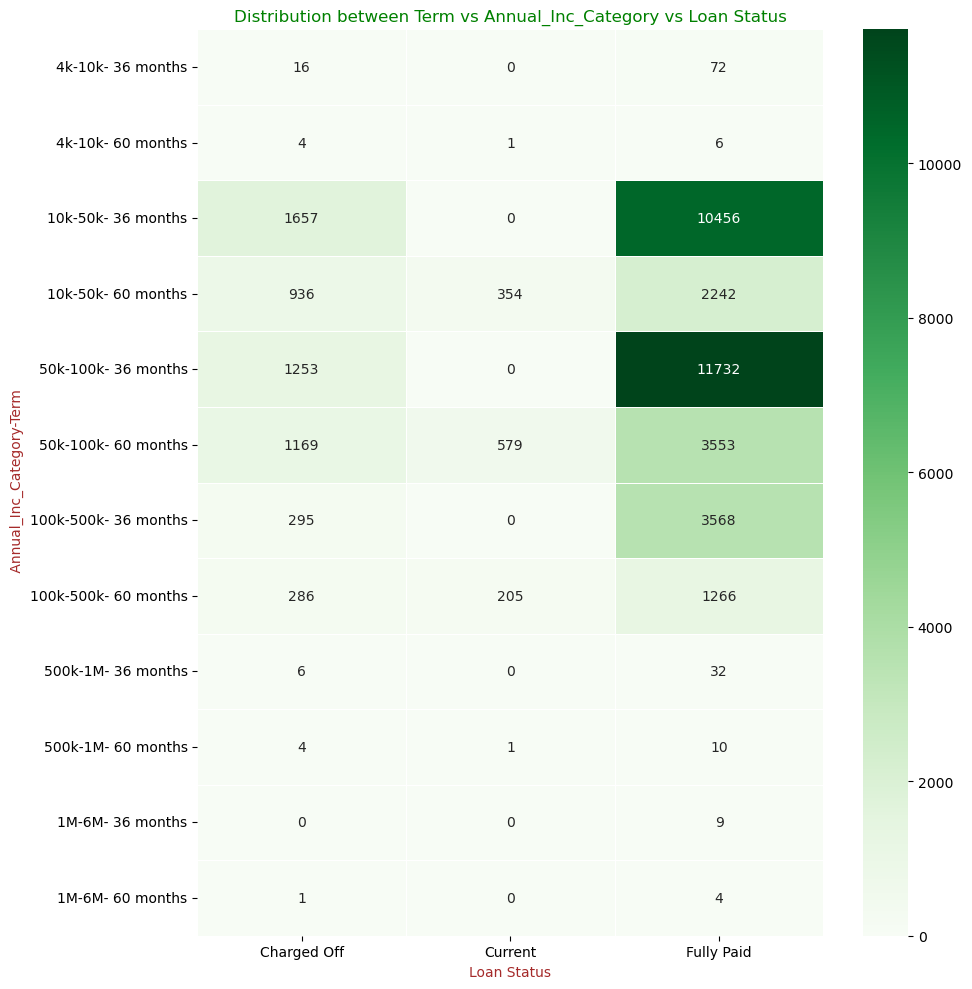

In [111]:
for column in ["grade", "sub_grade",  "emp_length", "home_ownership", "verification_status", "purpose", "annual_inc_category"]:
    counts = df.groupby(["term", column, "loan_status"]).size().reset_index(name="Count")

    heatmap_data = counts.pivot_table(index=[column, "term"], columns="loan_status", values="Count", fill_value=0)

    plt.figure(figsize=(10, 10))
    sns.heatmap(heatmap_data, annot=True, cmap="Greens", fmt="d", linewidths=0.5)

    plt.title(f"Distribution between Term vs {column.title()} vs Loan Status", color="green")
    plt.xlabel("Loan Status", color="brown")
    plt.ylabel(f" {column.title()}-Term", color="brown")

    plt.tight_layout()
    plt.show()

- Tenure:
    - Grade A with shorter tenure of 36 months experienced higher Full Paid loan wheres grade B with tenure of 36 months are more likely to charged off
    - Sub-grade A4 with larger tenure of 60 months experienced Fully Paid Loans wheres sub-grade B5 with larger tenure i.e 60 months are more likely to charged off.
    - Individuals with 10+ years of experience are most likely to fully pay the loan, but we see similar trend in charged off as well.
    - Individuals staying in Rent are most likely to fully pay the loan, but we see similar trend in charged off as well.
    - Individuals who are not verified but have shorter tenures exhibit a strong tendency to repay their loans and a moderately strong likelihood of experiencing a charge-off.
    - Individuals who have applied for debt consolidation for shorter tenure exhibit strong trend to repay the loan and a moderately strong likelihood of experiencing a charged-off.
    - Individuals earning 50k-100k for a shorter tenure loan are most likely to repay the loan while individuals earning 10k-50k  for a shorter tenure loan are most likely to get charged off.

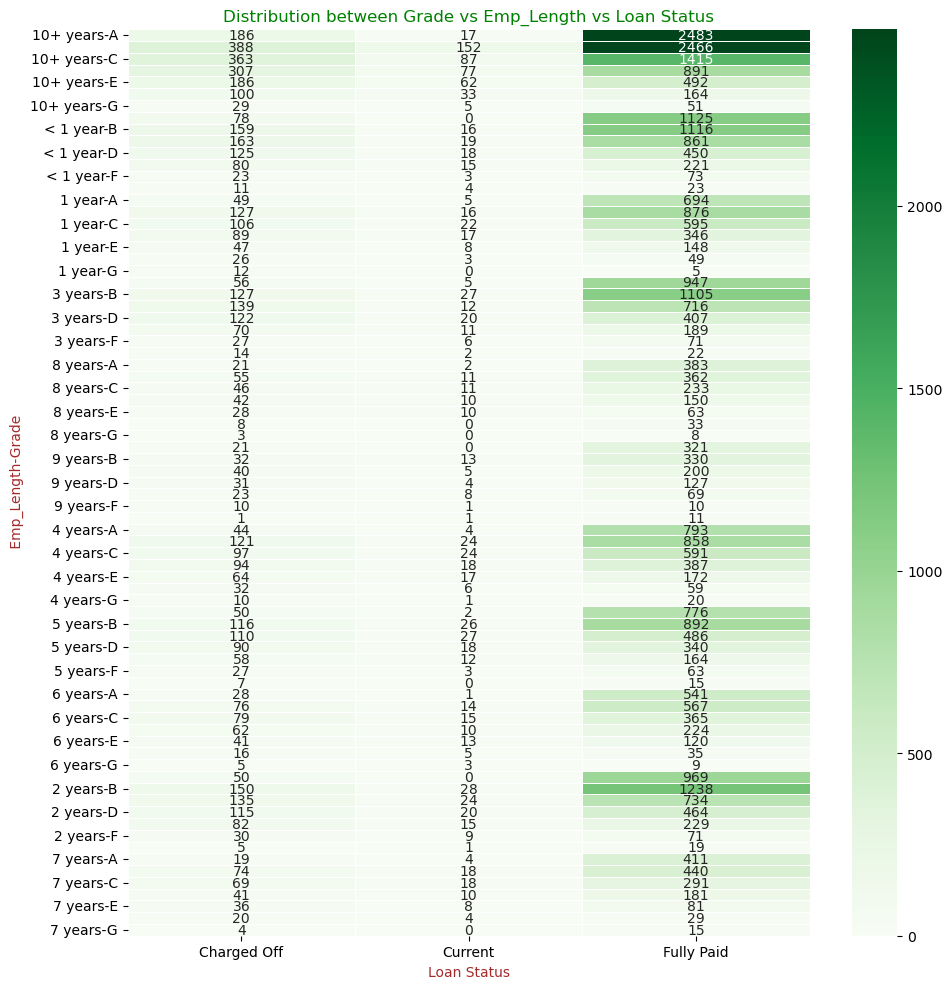

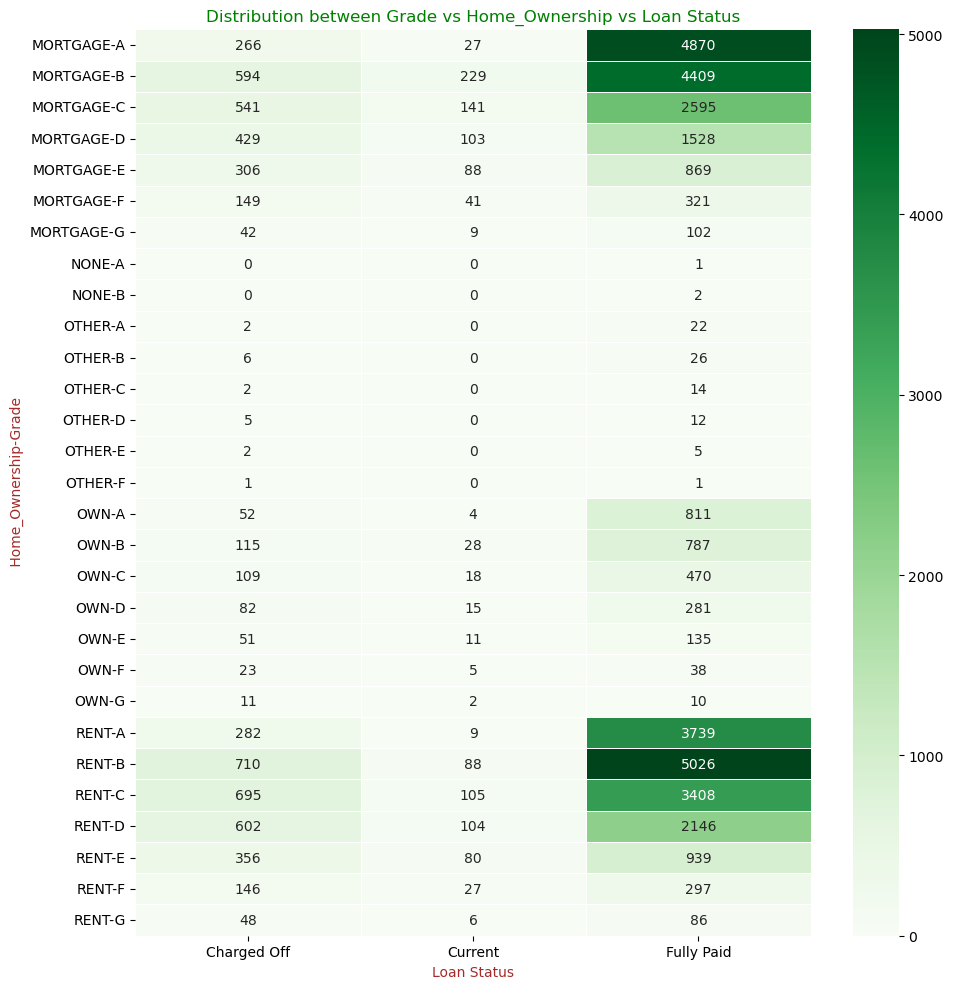

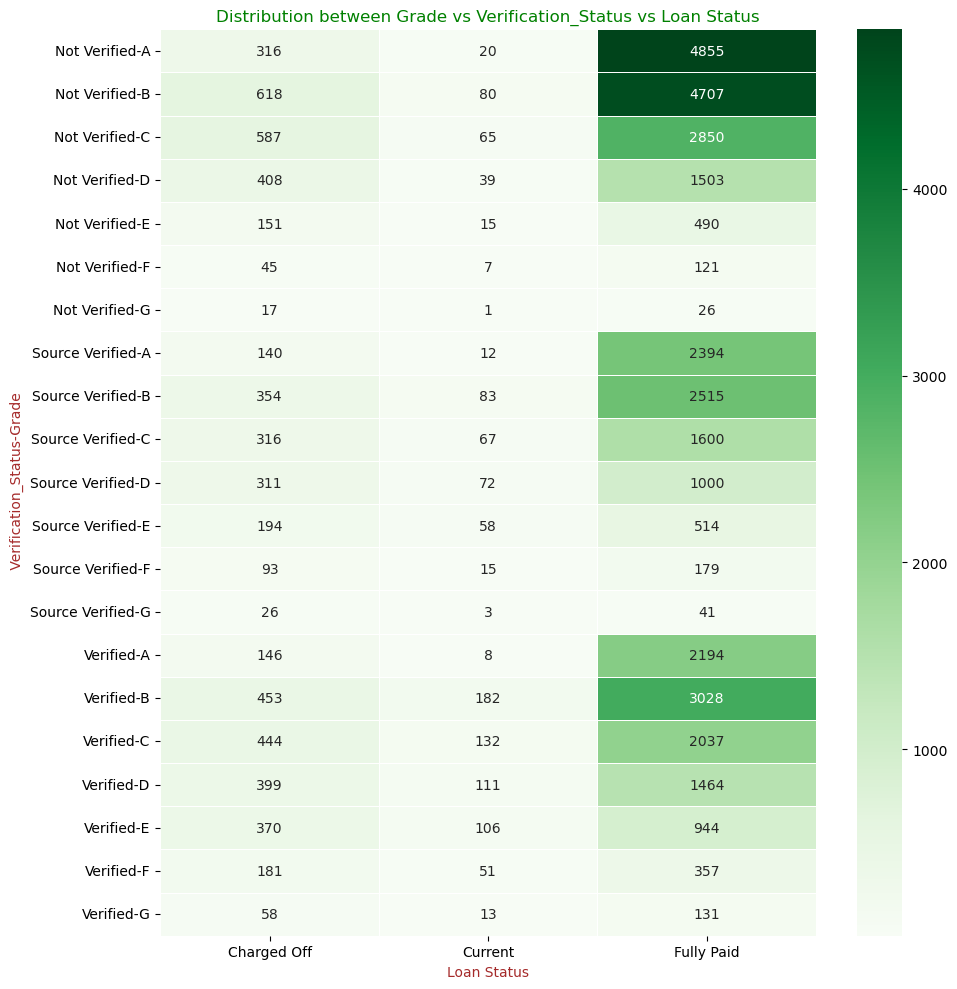

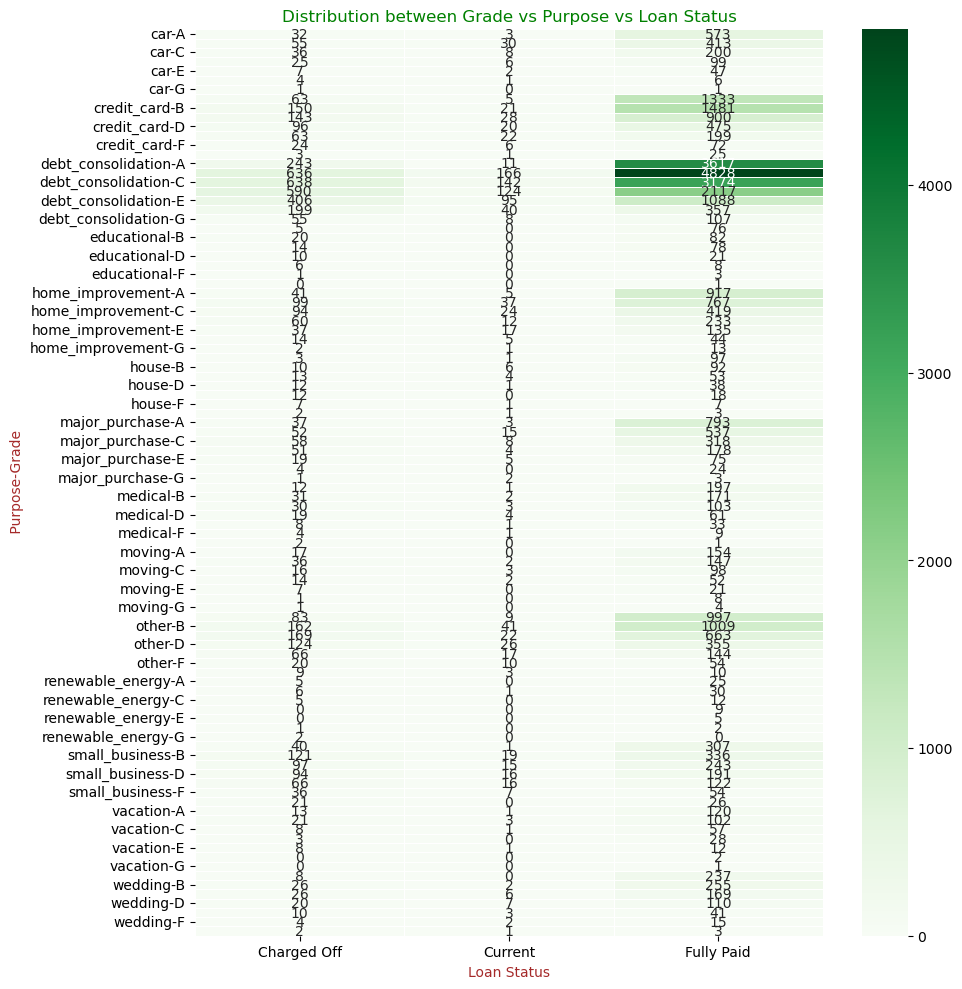

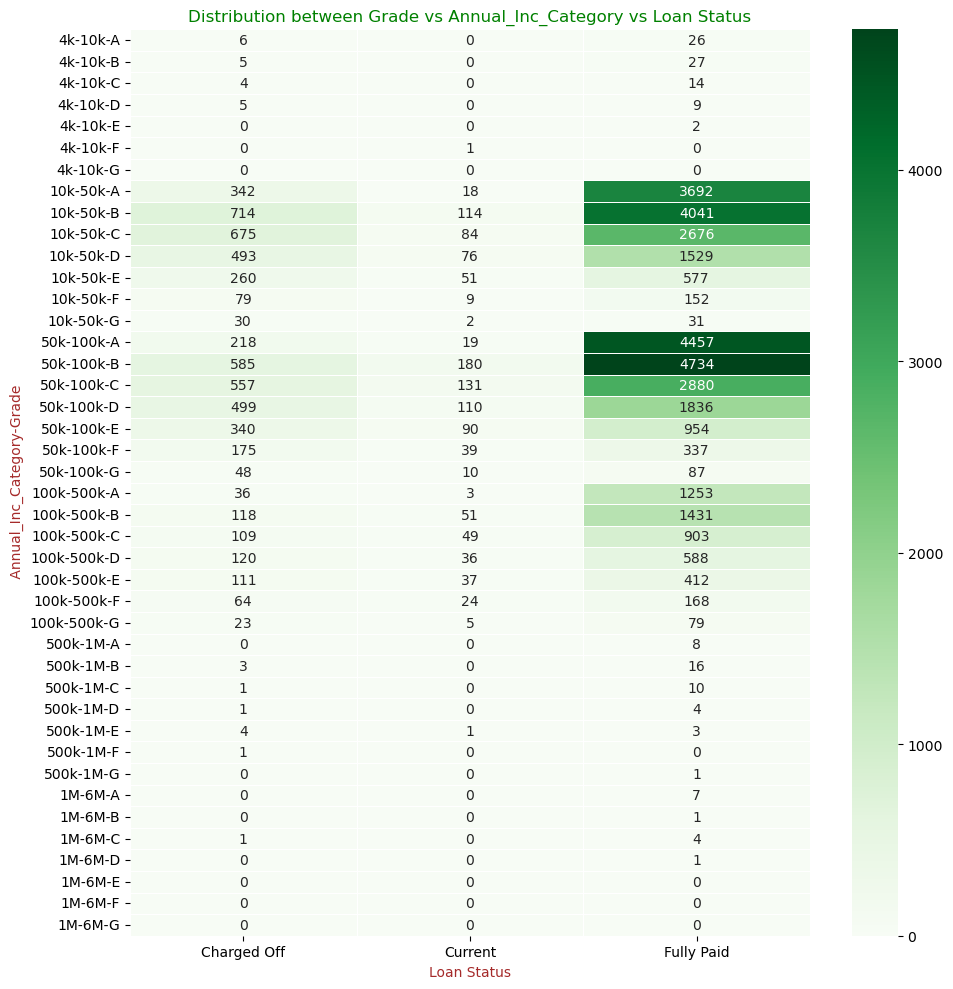

In [112]:
for column in ["emp_length", "home_ownership", "verification_status", "purpose", "annual_inc_category"]:
    counts = df.groupby(["grade", column, "loan_status"]).size().reset_index(name="Count")

    heatmap_data = counts.pivot_table(index=[column, "grade"], columns="loan_status", values="Count", fill_value=0)

    plt.figure(figsize=(10, 10))
    sns.heatmap(heatmap_data, annot=True, cmap="Greens", fmt="d", linewidths=0.5)

    plt.title(f"Distribution between Grade vs {column.title()} vs Loan Status", color="green")
    plt.xlabel("Loan Status", color="brown")
    plt.ylabel(f" {column.title()}-Grade", color="brown")

    plt.tight_layout()
    plt.show()

- Grade:
    - Individuals with 10+ years of experience with grade A exhihit strong tendency to repay the loan and moderately strong likelihood to get charged off.
    - Individuals who stay in Rent and have loan grade B exhihit strong tendency to repay the loan and moderately strong likelihood to get charged off.
    - Individuals who are not Verified for loan grade A shows strong trend to repay the loan. Individual who are not verified and have loan grade B are most likely to get charged off.
    - Individuals who have applied for debt consolidation for loan grade A exhibit strong trend to repay the loan and  individuals who have applied for debt consolidation for loan grade C moderately strong likelihood of experiencing a charged-off.
    - Individuals earning 50k-100k for loan grade B are most likely to repay the loan while individuals earning 10k-50k for same loan grade B are most likely to get charged off.

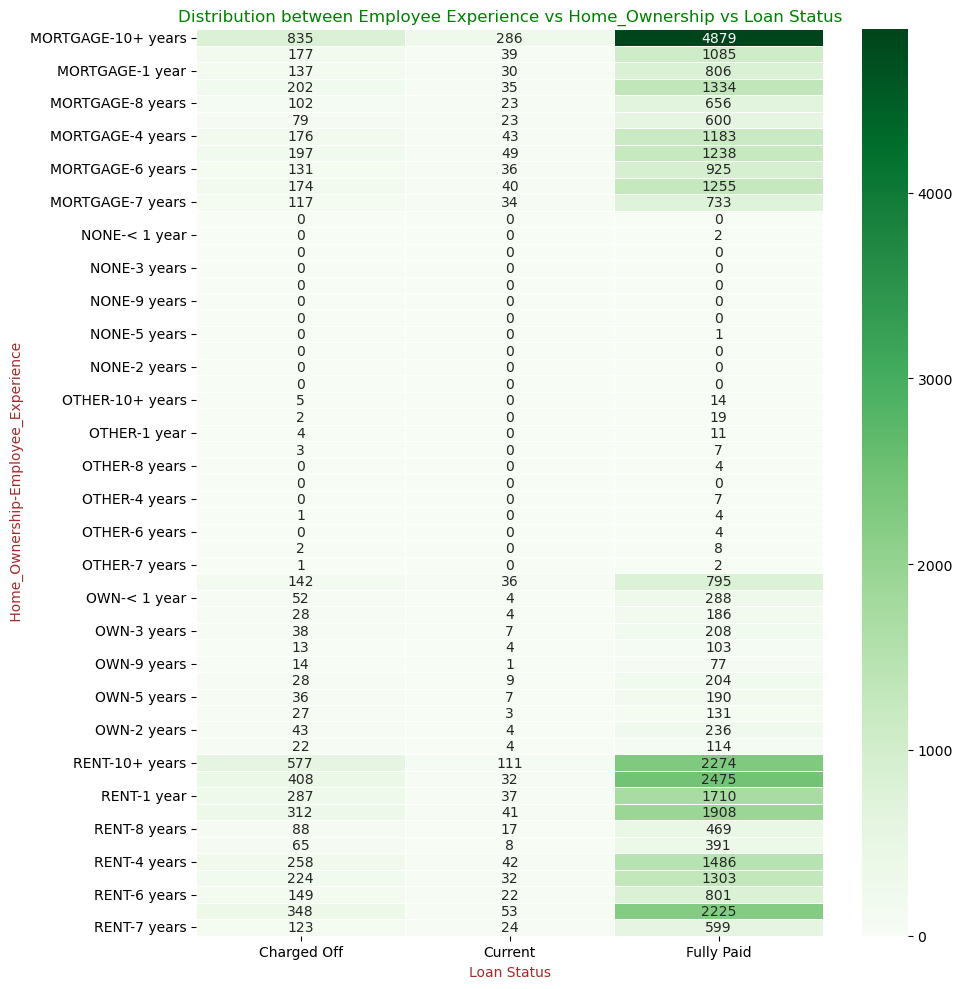

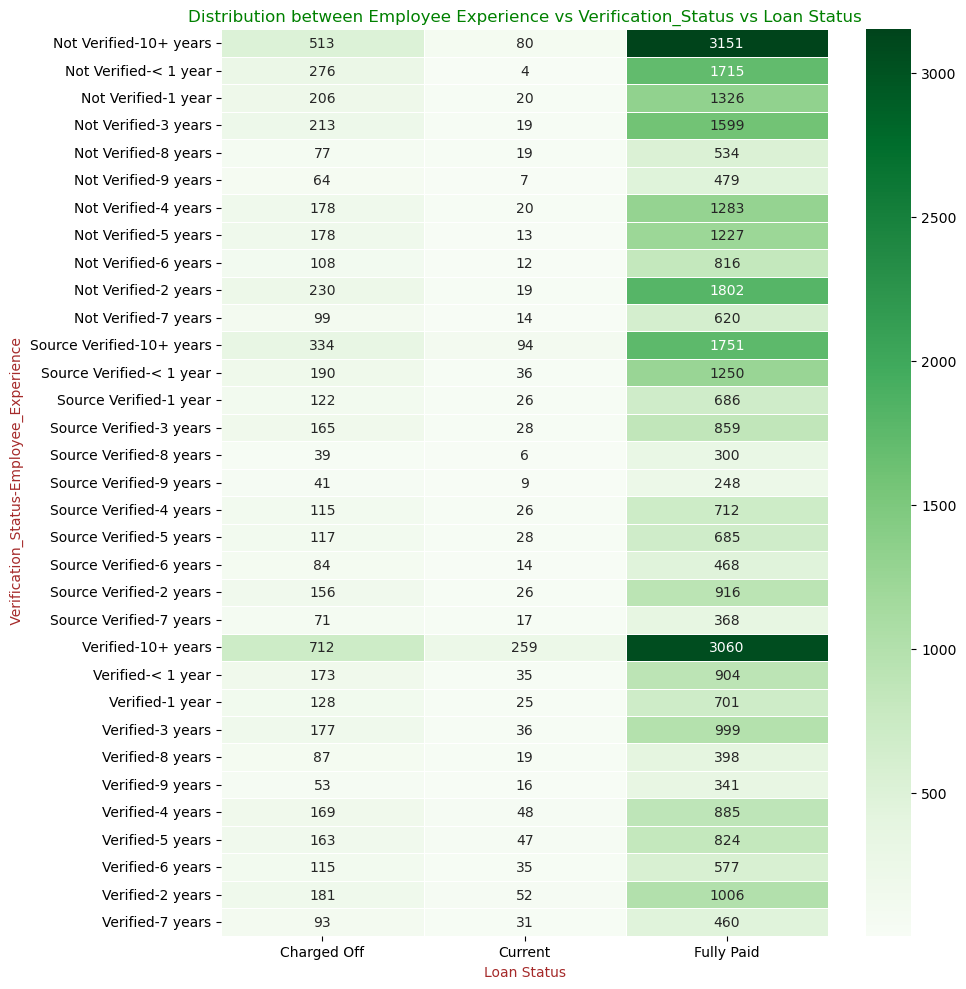

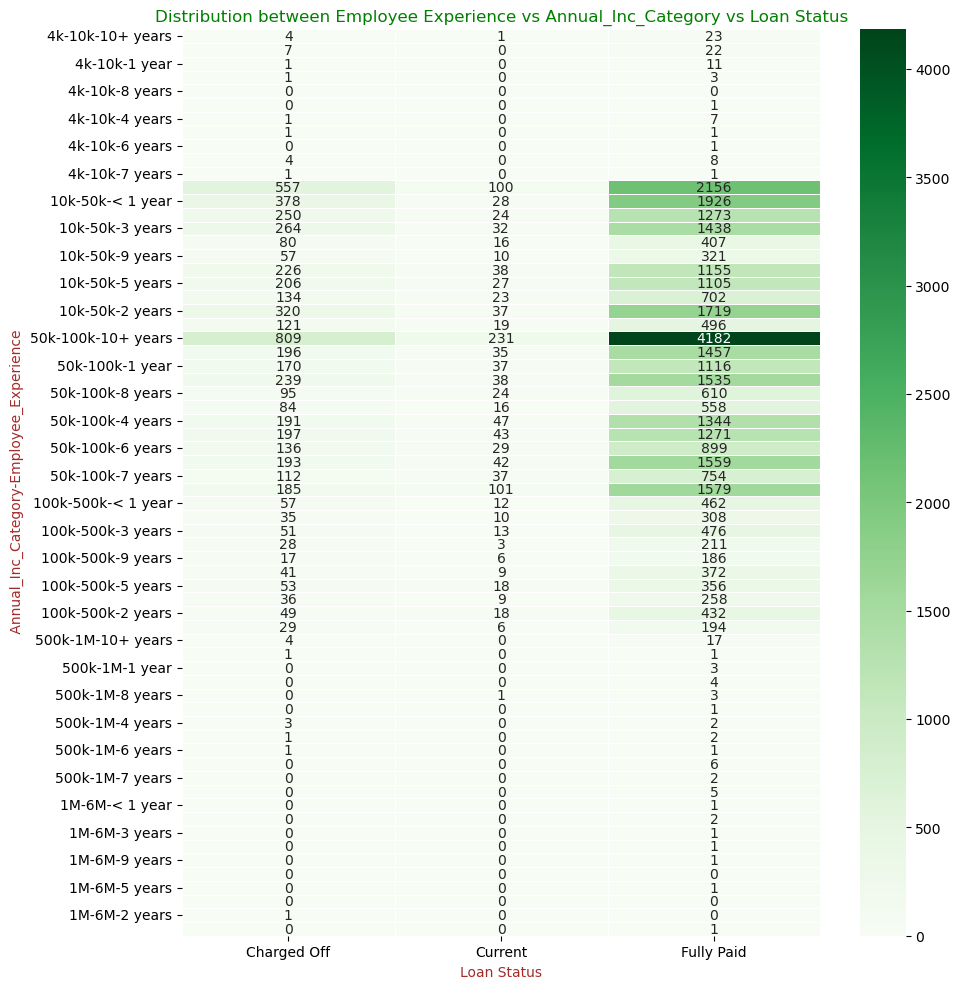

In [113]:
for column in ["home_ownership", "verification_status", "annual_inc_category"]:
    counts = df.groupby(["emp_length", column, "loan_status"]).size().reset_index(name="Count")

    heatmap_data = counts.pivot_table(index=[column, "emp_length"], columns="loan_status", values="Count", fill_value=0)

    plt.figure(figsize=(10, 10))
    sns.heatmap(heatmap_data, annot=True, cmap="Greens", fmt="d", linewidths=0.5)

    plt.title(f"Distribution between Employee Experience vs {column.title()} vs Loan Status", color="green")
    plt.xlabel("Loan Status", color="brown")
    plt.ylabel(f" {column.title()}-Employee_Experience", color="brown")

    plt.tight_layout()
    plt.show()

- Employee Experience:
   - Individuals with over 10 years of experience who own a home with a mortgage show a strong tendency to repay their loans and a moderately strong likelihood of experiencing a charge-off..
    - Individuals who are not verified with 10+ years of experience shows strong trend to repay the loan. Individual who are verified with 10+ years of experience shows strong trend to get charged off.
    - Individuals earning 50k-100k for employees with 10+ years of experience are most likely to repay the loan and a moderately strong likelihood of experiencing a charge-off.

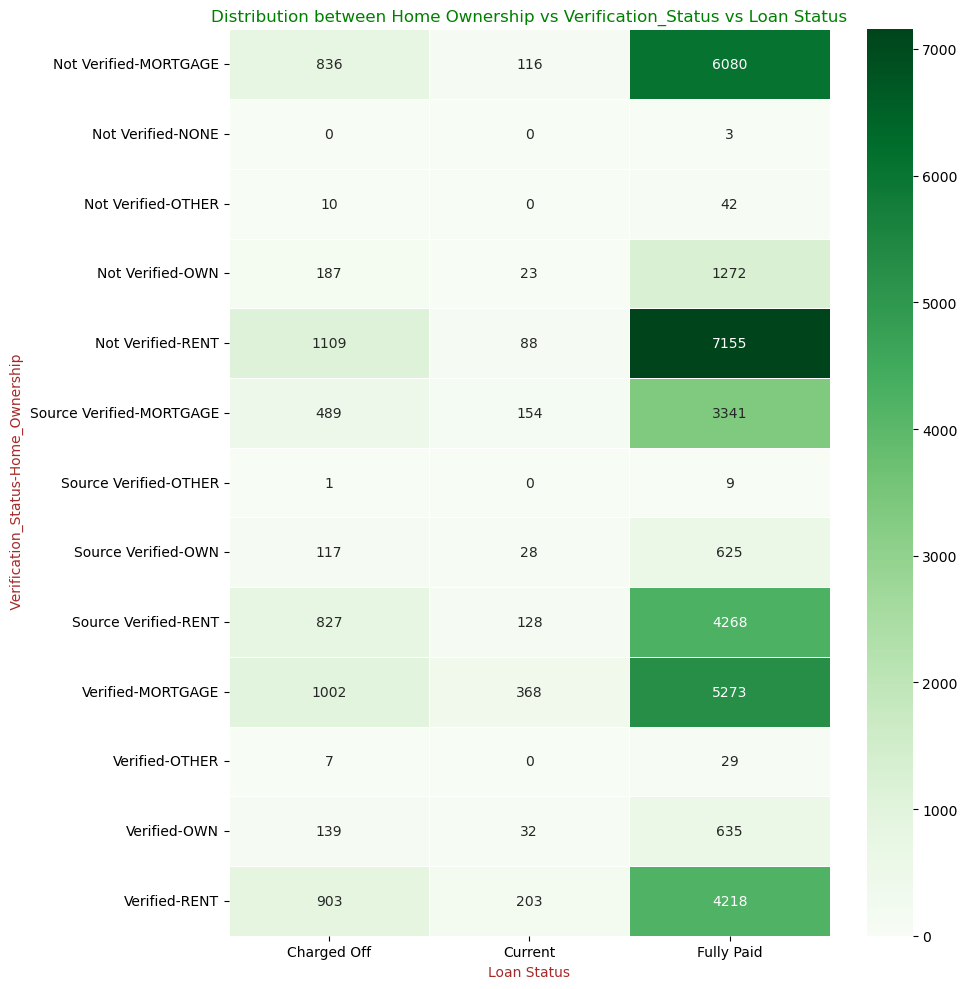

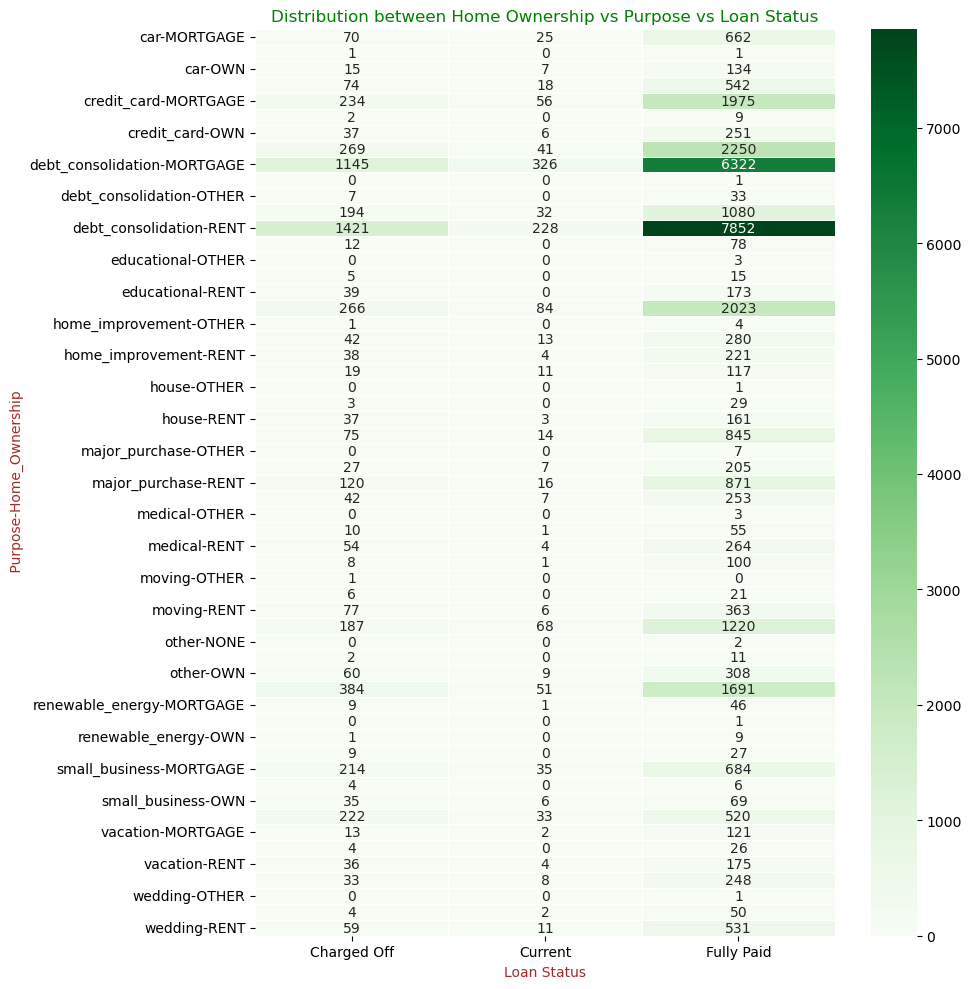

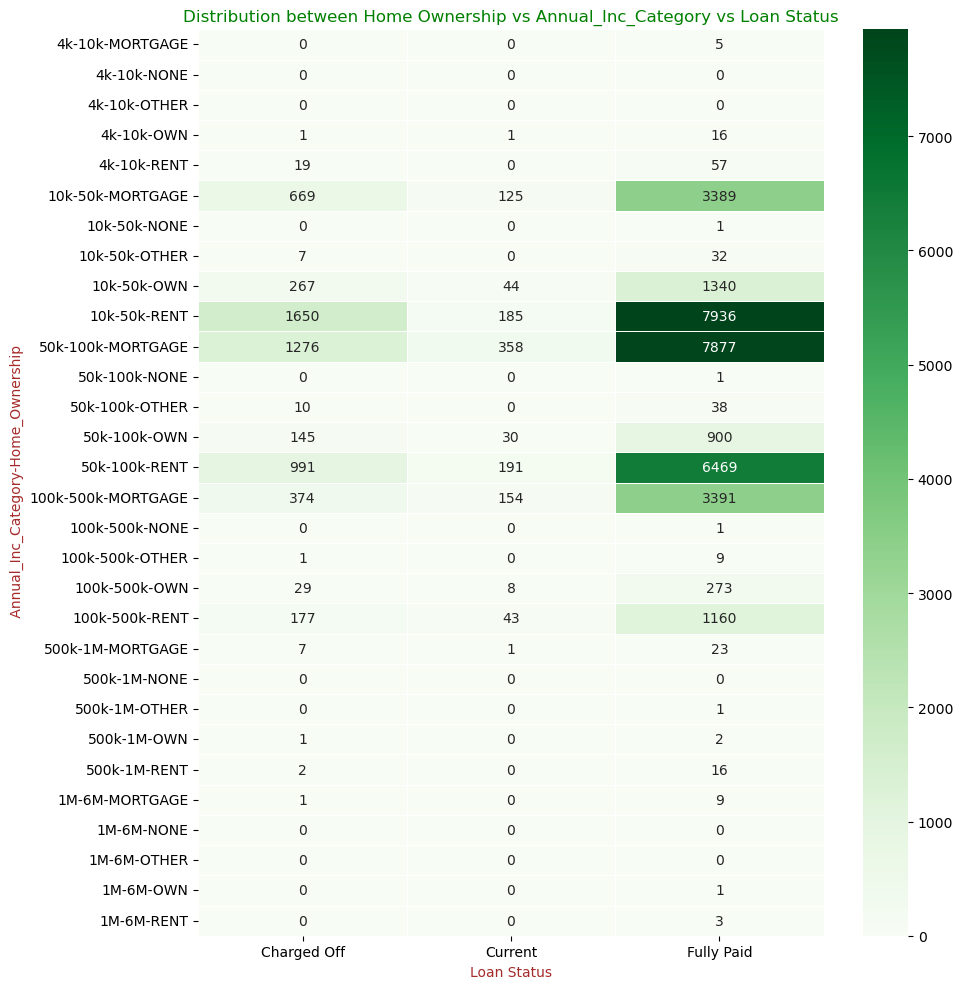

In [110]:
for column in ["verification_status", "purpose", "annual_inc_category"]:
    counts = df.groupby(["home_ownership", column, "loan_status"]).size().reset_index(name="Count")

    heatmap_data = counts.pivot_table(index=[column, "home_ownership"], columns="loan_status", values="Count", fill_value=0)

    plt.figure(figsize=(10, 10))
    sns.heatmap(heatmap_data, annot=True, cmap="Greens", fmt="d", linewidths=0.5)

    plt.title(f"Distribution between Home Ownership vs {column.title()} vs Loan Status", color="green")
    plt.xlabel("Loan Status", color="brown")
    plt.ylabel(f" {column.title()}-Home_Ownership", color="brown")

    plt.tight_layout()
    plt.show()

- Home Ownership:
   - Individuals who are not verified and Rented show a strong tendency to repay their loans and a moderately strong likelihood of experiencing a charge-off.
    - Individuals who have applied for debt consolidation and Rented show a strong tendency to repay their loans and a moderately strong likelihood of experiencing a charge-off.
    - Individuals earning 10k-50k rented and individuals who earns 50k-100k mortgage are most likely to repay the loan and a moderately strong likelihood of experiencing a charge-off.

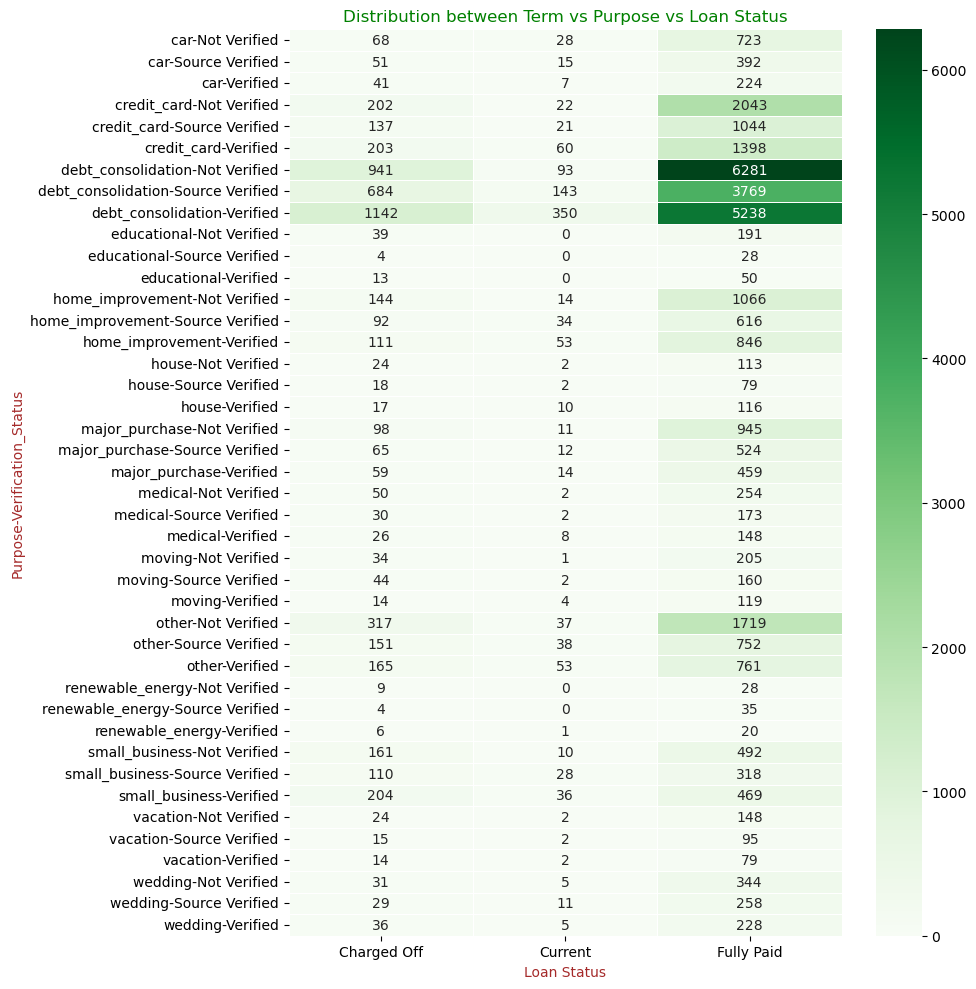

In [97]:
counts = df.groupby(["verification_status", "purpose", "loan_status"]).size().reset_index(name="Count")

heatmap_data = counts.pivot_table(index=["purpose", "verification_status"], columns="loan_status", values="Count", fill_value=0)

plt.figure(figsize=(10, 10))
sns.heatmap(heatmap_data, annot=True, cmap="Greens", fmt="d", linewidths=0.5)

plt.title("Distribution between Term vs Purpose vs Loan Status", color="green")
plt.xlabel("Loan Status", color="brown")
plt.ylabel("Purpose-Verification_Status", color="brown")

plt.tight_layout()
plt.show()

- Purpose
    - Individuals who took loan for debt-consolidation and are not verified exhibit stronger trend to repay the loan whereas individual who applied for same purpose and are verified are most lkely to be charged off.

##### Analysis on Loan Status with Categories and Numerical Column

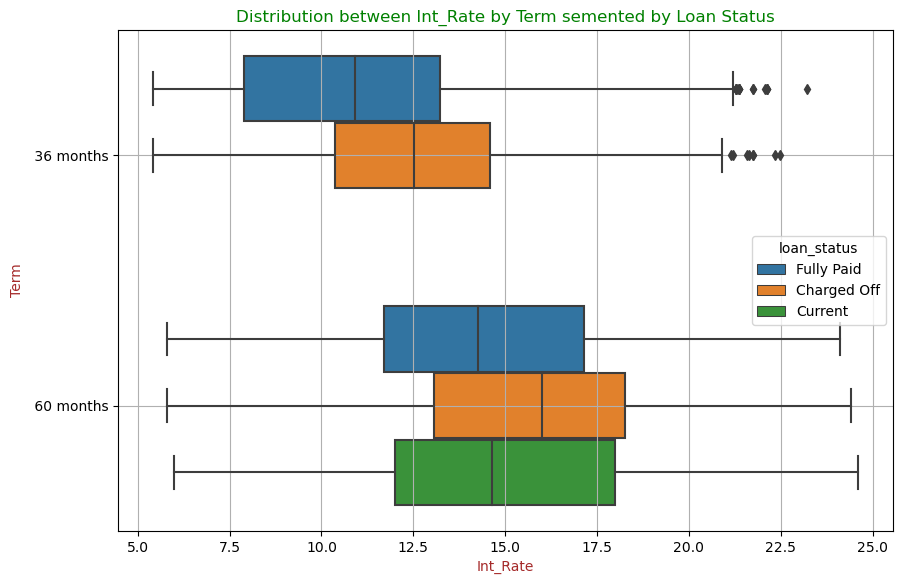

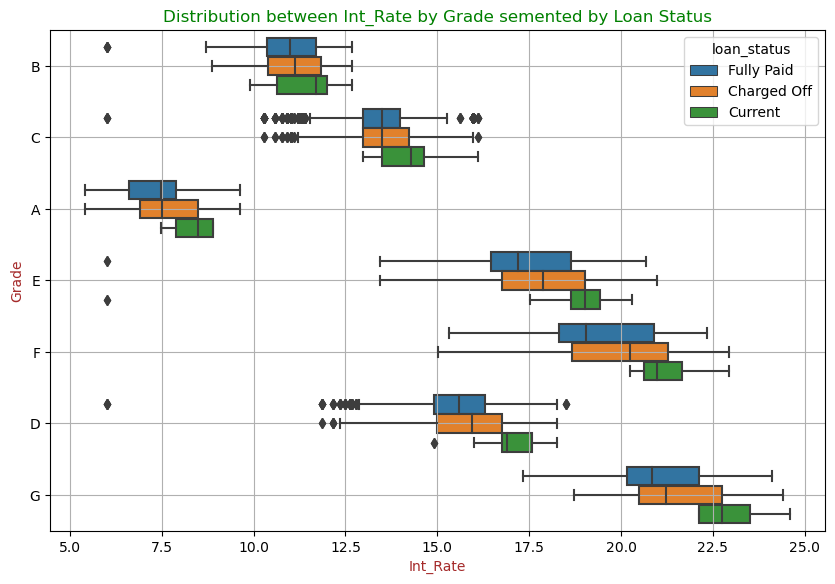

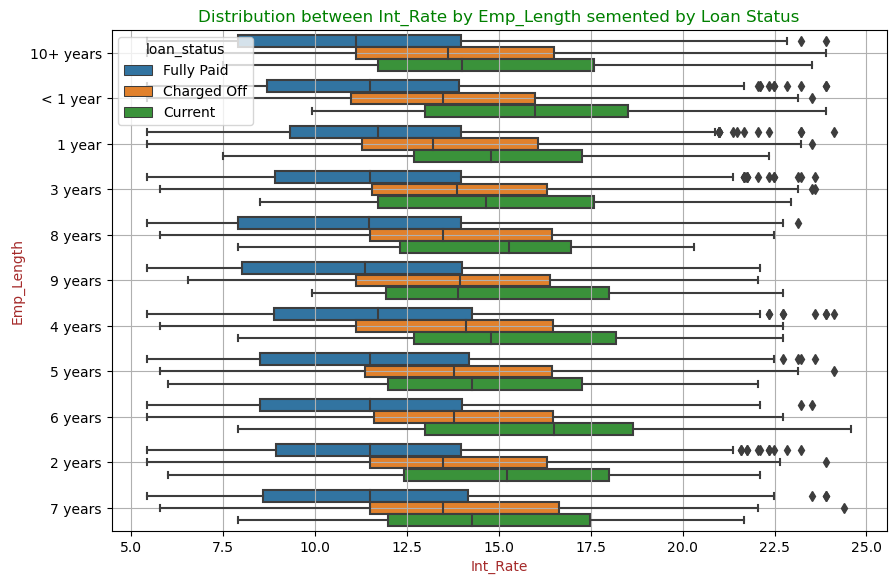

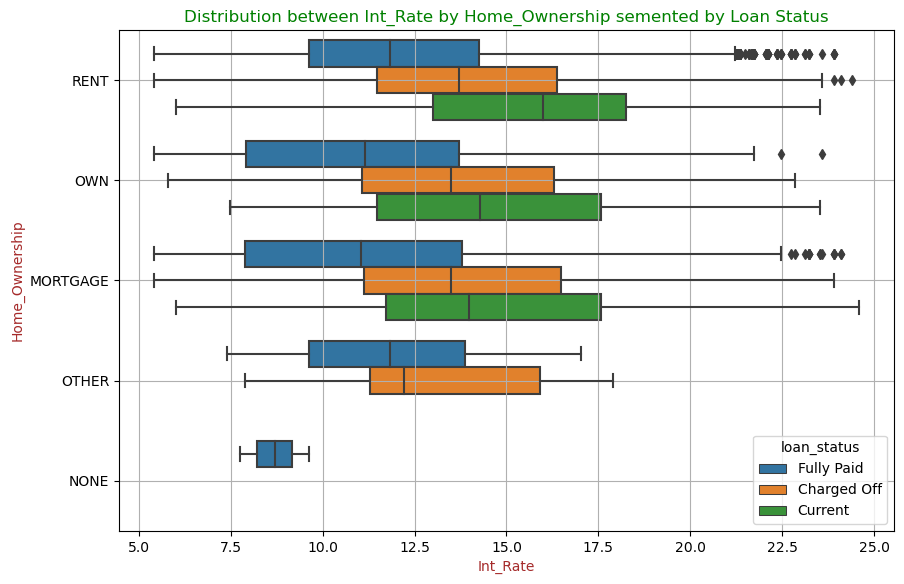

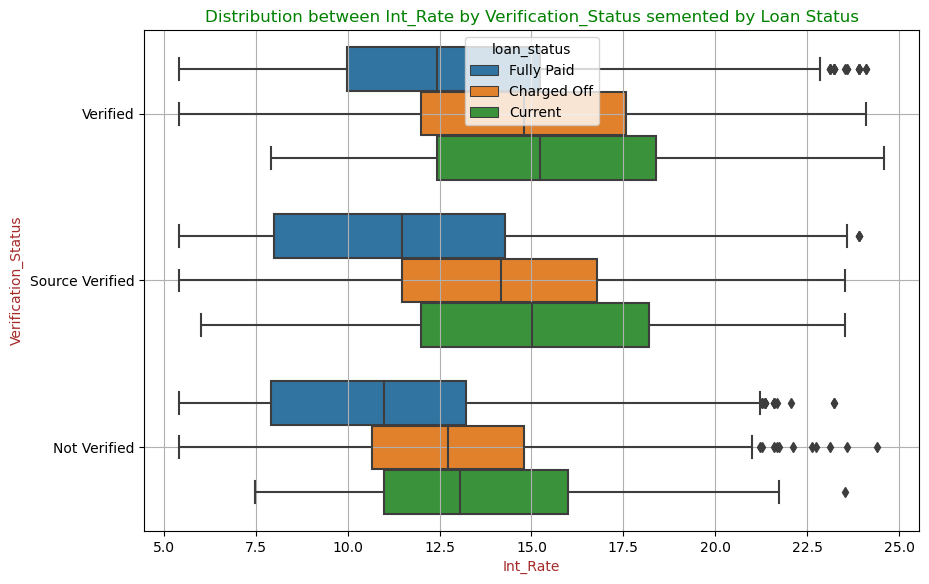

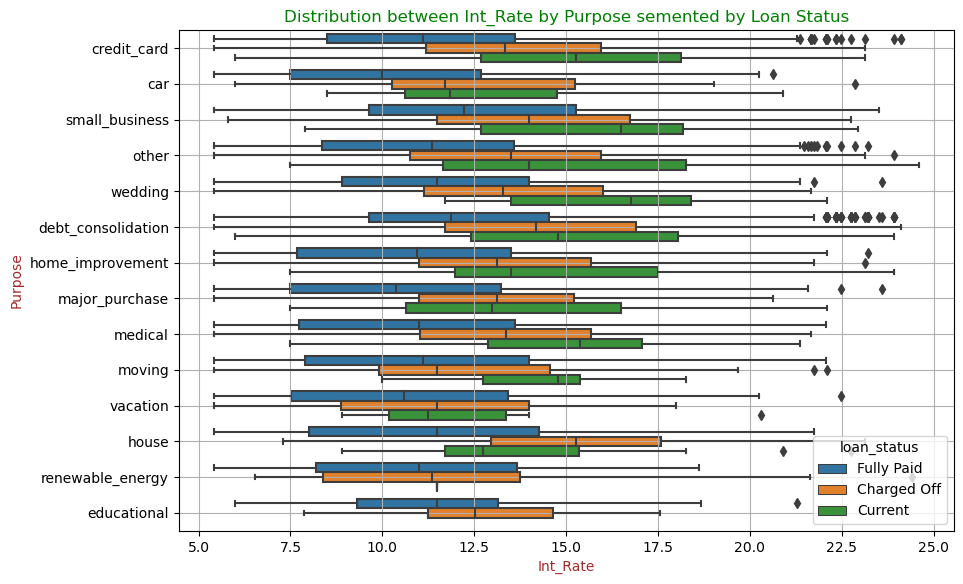

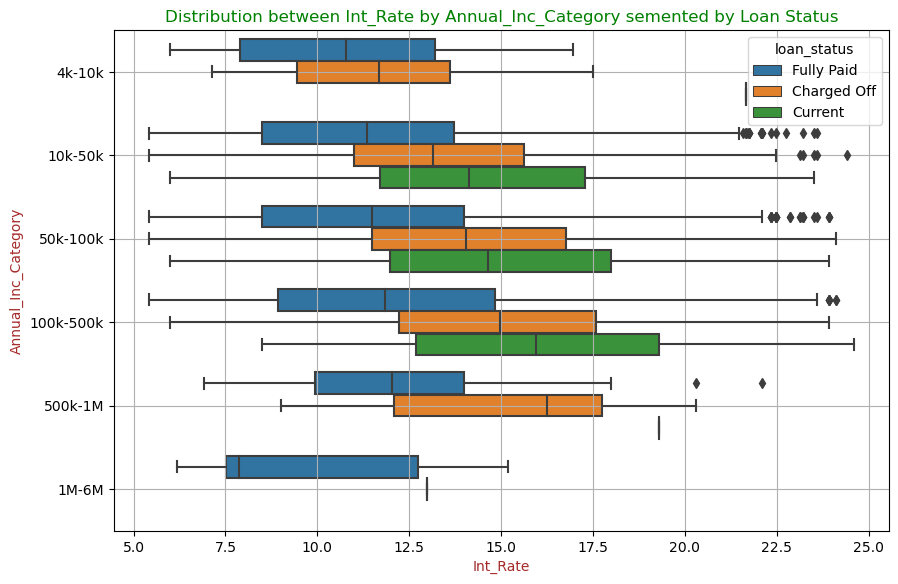

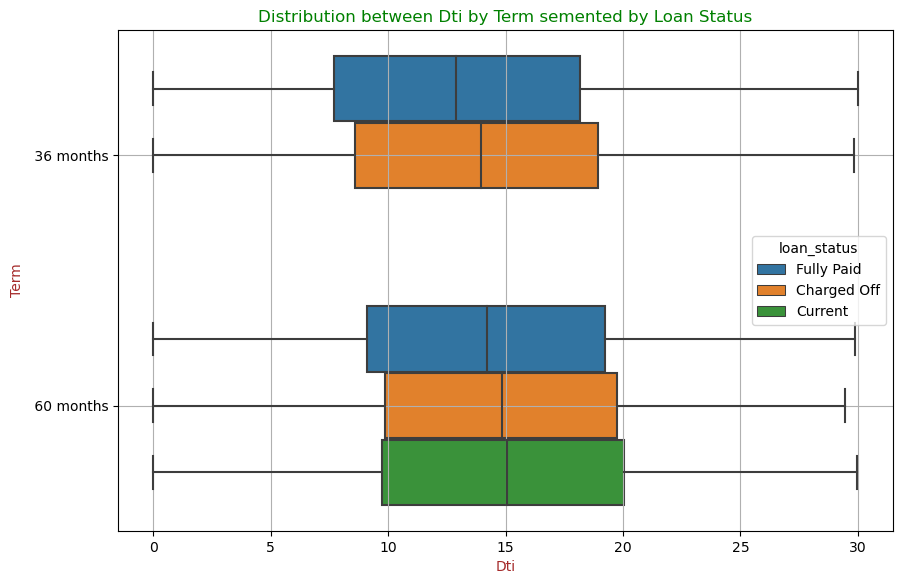

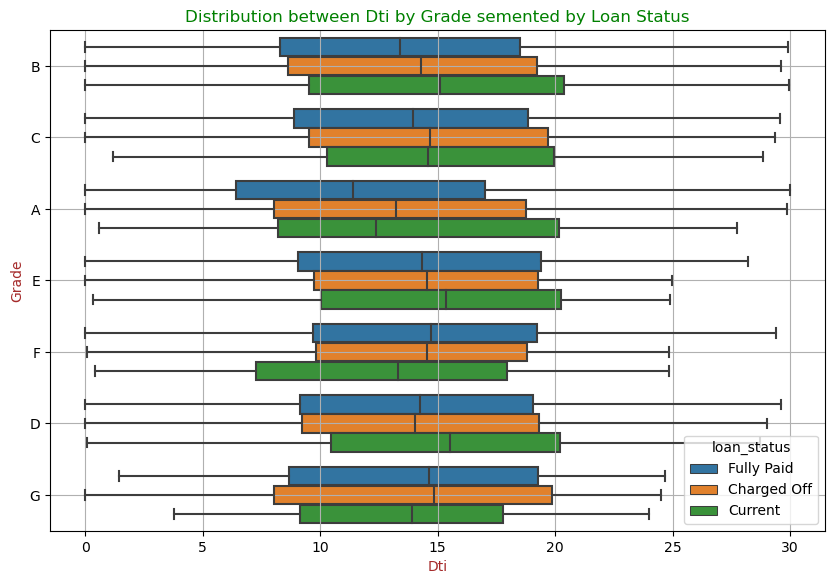

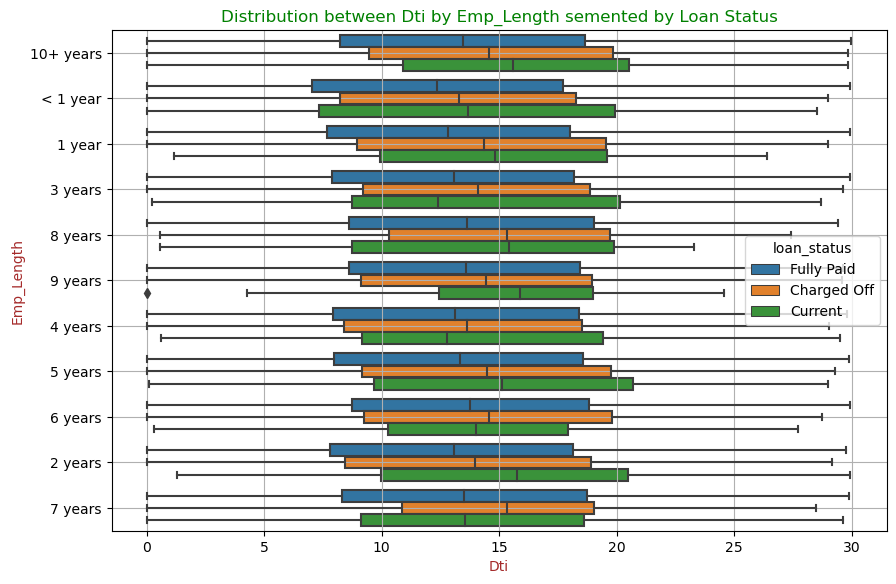

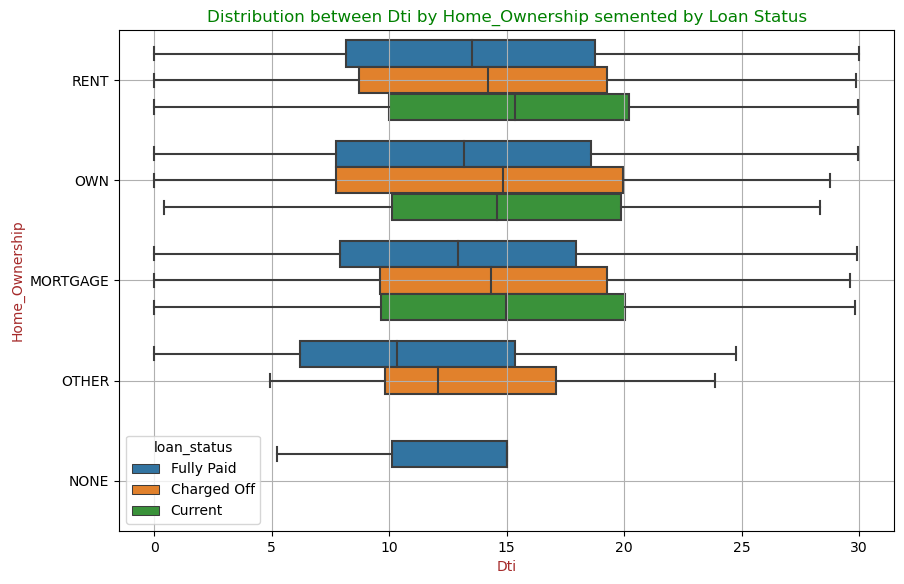

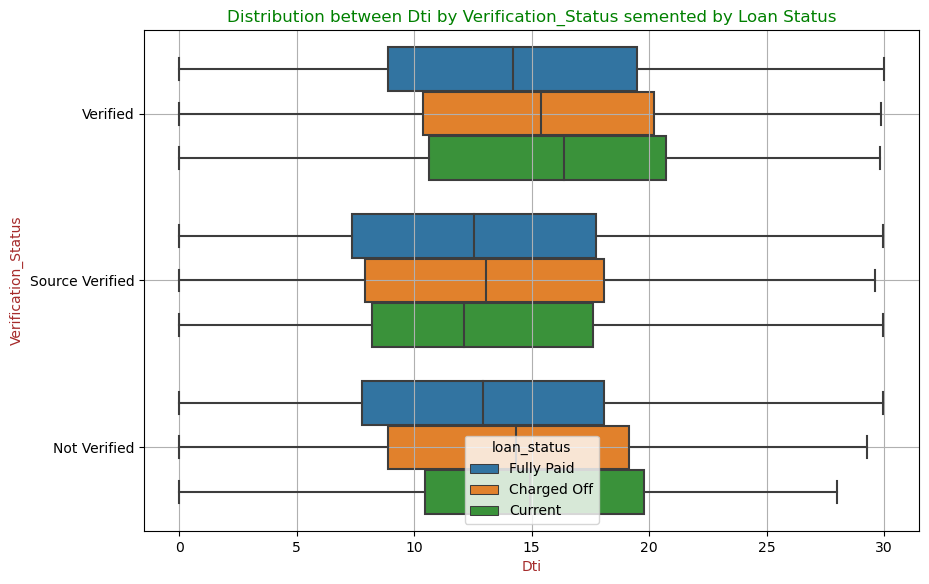

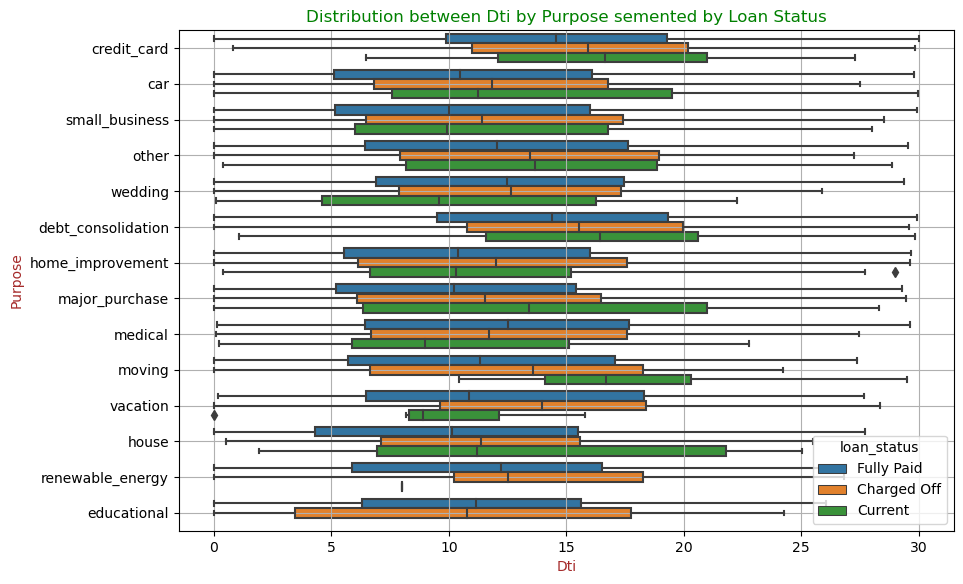

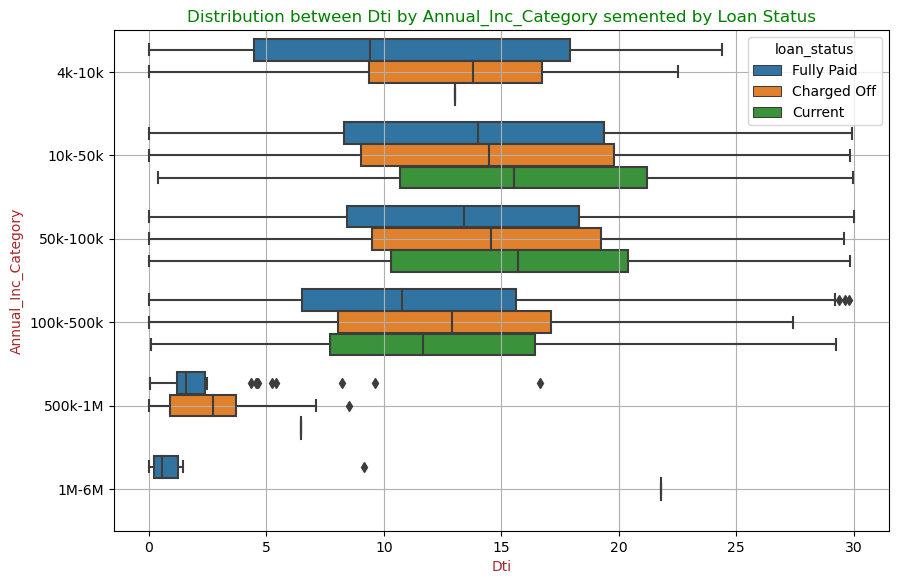

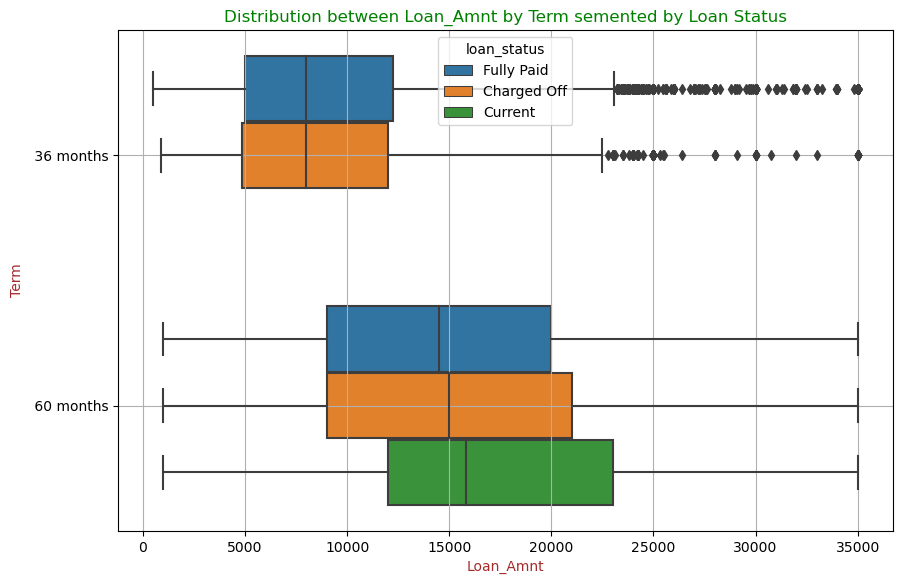

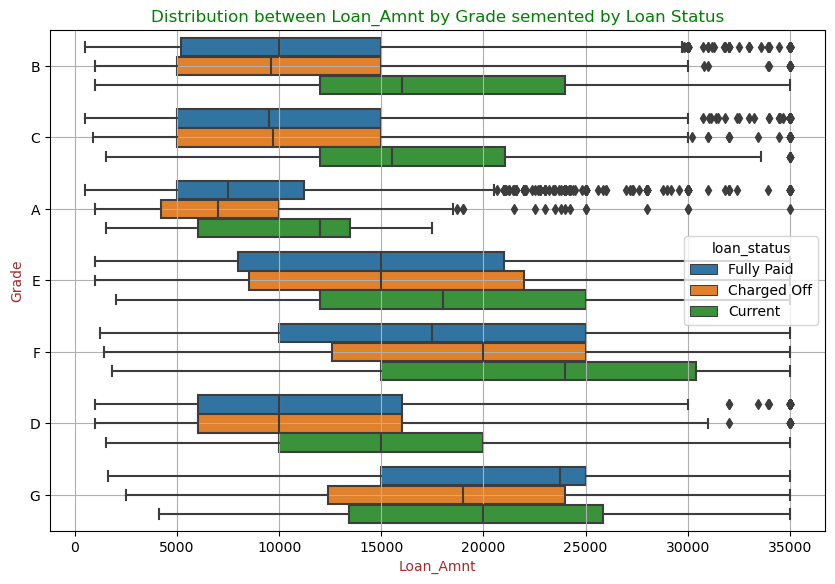

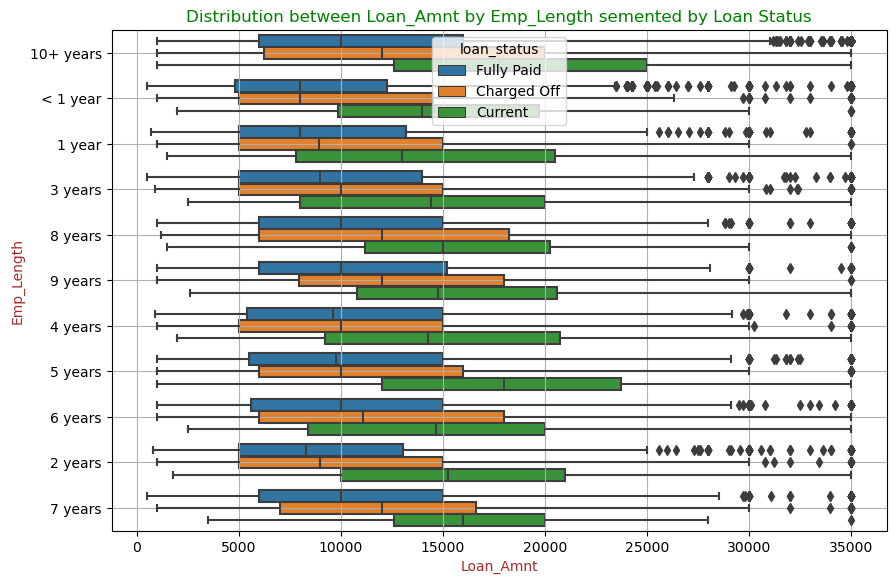

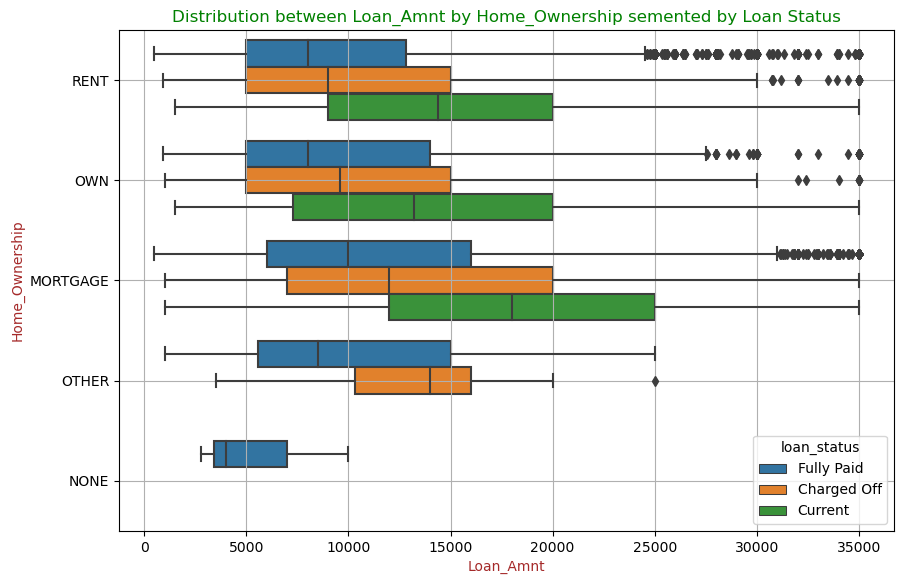

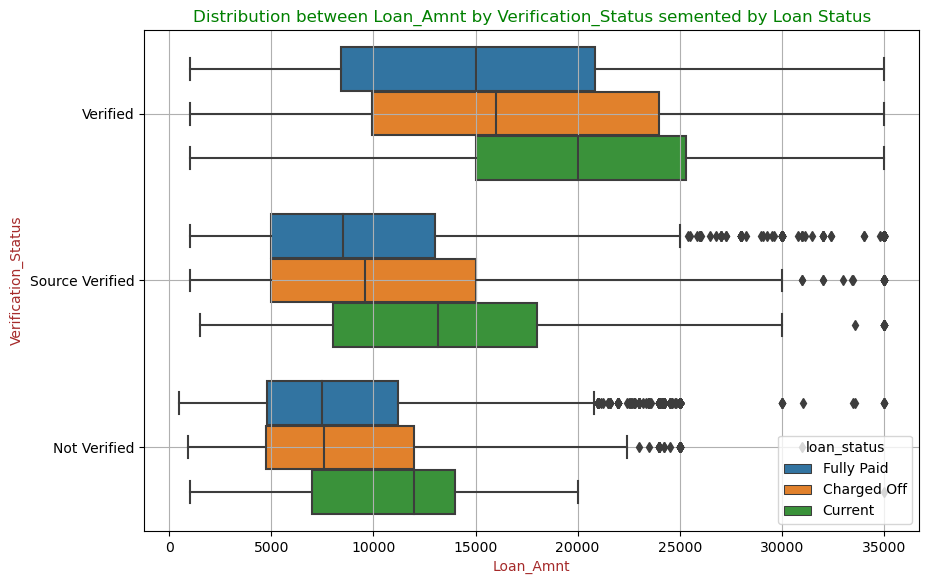

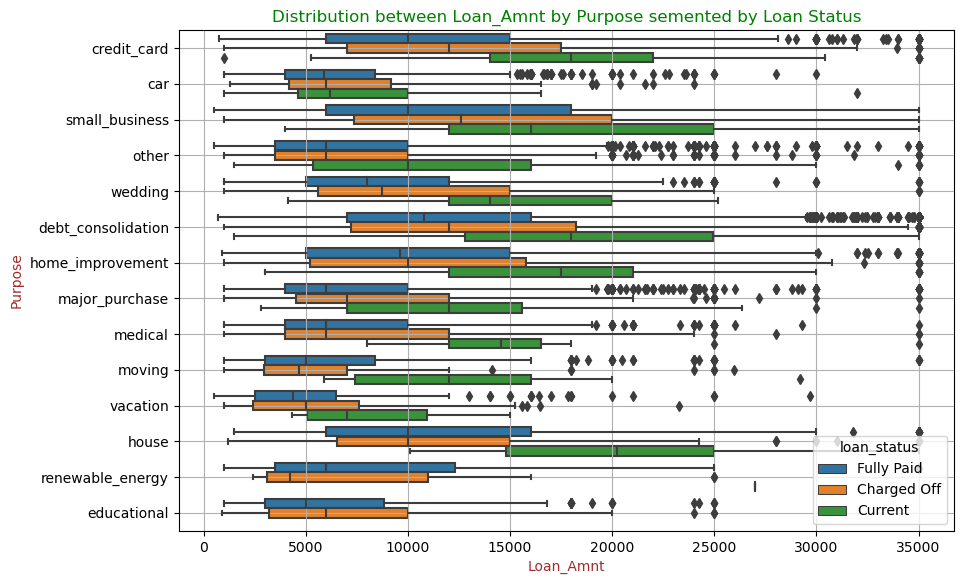

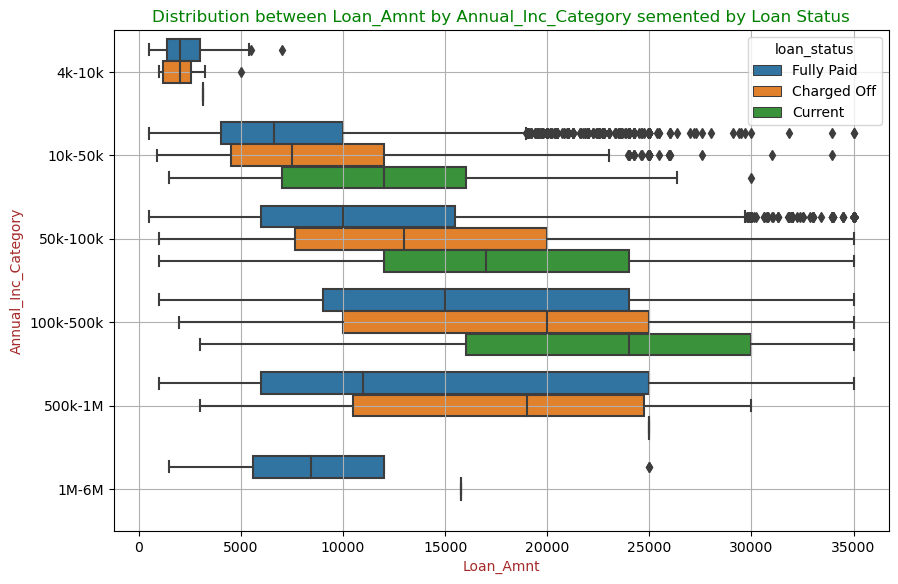

In [105]:
for numerical in ["int_rate", "dti", "loan_amnt"]:
    for category in ["term", "grade", "emp_length", "home_ownership", "verification_status", "purpose", "annual_inc_category"]:
        plt.figure(figsize=(10, 6.5))
        sns.boxplot(x=numerical, y=category, hue="loan_status", data=df)

        plt.title(f"Distribution between {numerical.title()} by {category.title()} semented by Loan Status", color="green")
        plt.xlabel(f"{numerical.title()}", color="brown")
        plt.ylabel(f"{category.title()}", color="brown")

        plt.grid(True)

        plt.show()